# Description

It plots specific gene pairs from different subsets of the UpSet plot (intersections) generated before.

The idea of the notebook is to take a look at the patterns found/not found by different methods.

**Note after manuscript revision:** The "Selection" section below each gene pair category has a selection considering the first selection (first manuscript submission) and a second selection (after manuscript revision) considering the p-value.

# Modules

In [1]:
import pandas as pd
import numpy as np
import pytest

import matplotlib.pyplot as plt
import seaborn as sns

from ccc.plots import jointplot
from ccc import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_DATA_DIR = DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
assert OUTPUT_DATA_DIR.exists()
display(OUTPUT_DATA_DIR)

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections')

In [5]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"gtex_{GTEX_TISSUE}"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood')

In [6]:
INPUT_GENE_EXPR_FILE = (
    DATASET_CONFIG["GENE_SELECTION_DIR"]
    / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_EXPR_FILE)

assert INPUT_GENE_EXPR_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_selection/gtex_v8_data_whole_blood-var_pc_log2.pkl')

In [7]:
INPUT_GENE_PAIRS_INTERSECTIONS_FILE = (
    DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
    / f"gene_pair_intersections-gtex_v8-{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

assert INPUT_GENE_PAIRS_INTERSECTIONS_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/gene_pair_intersections-gtex_v8-whole_blood-var_pc_log2.pkl')

In [8]:
INPUT_PVALUES_FILE = (
    DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
    / "pvalues"
    / "gene_pair-samples-pvalues-fdr.pkl"
)
display(INPUT_PVALUES_FILE)
assert INPUT_PVALUES_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/pvalues/gene_pair-samples-pvalues-fdr.pkl')

# Data

## Gene Ensembl ID -> Symbol mapping

In [9]:
gene_map = pd.read_pickle(
    DATASET_CONFIG["DATA_DIR"] / "gtex_gene_id_symbol_mappings.pkl"
)

In [10]:
gene_map = gene_map.set_index("gene_ens_id")["gene_symbol"].to_dict()

In [11]:
assert gene_map["ENSG00000145309.5"] == "CABS1"

## Gene expression

In [12]:
gene_expr_df = pd.read_pickle(INPUT_GENE_EXPR_FILE)

In [13]:
gene_expr_df.shape

(5000, 755)

In [14]:
gene_expr_df.head()

GTEX-111YS-0006-SM-5NQBE  GTEX-1122O-0005-SM-5O99J  \
gene_ens_id                                                              
ENSG00000169429.10                    0.5623                    0.8067   
ENSG00000135245.9                     0.6529                    1.3850   
ENSG00000163631.16                    1.8480                    0.2503   
ENSG00000277632.1                     1.6960                    1.3450   
ENSG00000239839.6                   185.2000                    1.7790   

                    GTEX-1128S-0005-SM-5P9HI  GTEX-113IC-0006-SM-5NQ9C  \
gene_ens_id                                                              
ENSG00000169429.10                 116.90000                     4.047   
ENSG00000135245.9                  199.20000                     2.266   
ENSG00000163631.16                   0.08429                     1.251   
ENSG00000277632.1                  235.10000                    11.770   
ENSG00000239839.6                  694.30000                    23.840   

                    GTEX-113JC-0006-SM-5O997  GTEX-117XS-0005-SM-5PNU6  \
gene_ens_id                                                              
ENSG00000169429.10                     211.0                    58.110   
ENSG00000135245.9                      116.7                   192.300   
ENSG00000163631.16                    1348.0                     9.971   
ENSG00000277632.1                      141.7                   199.100   
ENSG00000239839.6                      297.3                  3122.000   

                    GTEX-117YW-0005-SM-5NQ8Z  GTEX-1192W-0005-SM-5NQBQ  \
gene_ens_id                                                              
ENSG00000169429.10                     68.38                    249.50   
ENSG00000135245.9                     161.50                    263.50   
ENSG00000163631.16                    101.30                     95.09   
ENSG00000277632.1                     525.50                    659.90   
ENSG00000239839.6                    2521.00                   1504.00   

                    GTEX-1192X-0005-SM-5NQC3  GTEX-11DXW-0006-SM-5NQ7Y  ...  \
gene_ens_id                                                             ...   
ENSG00000169429.10                     5.095                     295.9  ...   
ENSG00000135245.9                     23.540                     251.9  ...   
ENSG00000163631.16                     1.264                     119.3  ...   
ENSG00000277632.1                     10.910                     209.3  ...   
ENSG00000239839.6                     80.060                     652.0  ...   

                    GTEX-ZVE2-0006-SM-51MRW  GTEX-ZVP2-0005-SM-51MRK  \
gene_ens_id                                                            
ENSG00000169429.10                   39.960                   0.1393   
ENSG00000135245.9                   114.300                   1.8330   
ENSG00000163631.16                    2.092                   2.1100   
ENSG00000277632.1                    61.340                   2.2500   
ENSG00000239839.6                  1010.000                 253.8000   

                    GTEX-ZVT2-0005-SM-57WBW  GTEX-ZVT3-0006-SM-51MT9  \
gene_ens_id                                                            
ENSG00000169429.10                  0.22380                    245.0   
ENSG00000135245.9                   0.41150                    149.0   
ENSG00000163631.16                  0.03588                    171.8   
ENSG00000277632.1                   0.72310                    261.2   
ENSG00000239839.6                  94.52000                   6083.0   

                    GTEX-ZVT4-0006-SM-57WB8  GTEX-ZVTK-0006-SM-57WBK  \
gene_ens_id                                                            
ENSG00000169429.10                    513.6                  1626.00   
ENSG00000135245.9                     935.3                   233.60   
ENSG00000163631.16                    107.1                    71.25   
ENSG00000277632.1   

## Gene pairs intersection

In [15]:
df_plot = pd.read_pickle(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

In [16]:
df_plot.shape

(12497500, 9)

In [17]:
df_plot.head()

Pearson (high)  Pearson (low)  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   

                                       Spearman (high)  Spearman (low)  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   

                                       Clustermatch (high)  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   

                                       Clustermatch (low)       ccc   pearson  \
ENSG00000000419.12 ENSG00000002834.17               False  0.418721  0.681847   
                   ENSG00000002919.14               False  0.405090  0.734699   
                   ENSG00000002933.7                 True  0.007466  0.013825   
                   ENSG00000003402.19               False  0.391683  0.727347   
                   ENSG00000004478.7                False  0.099013  0.094147   

                                       spearman  
ENSG00000000419.12 ENSG00000002834.17  0.786595  
                   ENSG00000002919.14  0.816991  
                   ENSG00000002933.7   0.004128  
                   ENSG00000003402.19  0.803653  
                   ENSG00000004478.7   0.231269

## p-values

In [18]:
df_pvalues = pd.read_pickle(INPUT_PVALUES_FILE).sort_index()

In [19]:
df_pvalues.shape

(12116, 10)

In [20]:
df_pvalues.head()

group  \
gene0              gene1                                                      
ENSG00000000938.12 ENSG00000128342.4   ccc_high_and_pearson_low-top_pearson   
                   ENSG00000249138.1        ccc_high_and_pearson_low-random   
ENSG00000001167.14 ENSG00000119862.12                       all_low-top_ccc   
                   ENSG00000131475.6                    all_low-top_pearson   
ENSG00000001561.6  ENSG00000086730.16                        all_low-random   

                                            ccc   ccc_fdr    ccc_pvalue  \
gene0              gene1                                                  
ENSG00000000938.12 ENSG00000128342.4   0.232700  0.000001  9.999990e-07   
                   ENSG00000249138.1   0.198172  0.000001  9.999990e-07   
ENSG00000001167.14 ENSG00000119862.12  0.034955  0.000001  9.999990e-07   
                   ENSG00000131475.6   0.028636  0.000004  2.999997e-06   
ENSG00000001561.6  ENSG00000086730.16  0.018550  0.000149  1.289999e-04   

                                        pearson  pearson_fdr  pearson_pvalue  \
gene0              gene1                                                       
ENSG00000000938.12 ENSG00000128342.4  -0.116906     0.002597        0.001291   
                   ENSG00000249138.1  -0.093076     0.015275        0.010503   
ENSG00000001167.14 ENSG00000119862.12  0.024366     0.532093        0.503820   
                   ENSG00000131475.6  -0.117799     0.002597        0.001184   
ENSG00000001561.6  ENSG00000086730.16 -0.002443     0.951313        0.946568   

                                       spearman  spearman_fdr  spearman_pvalue  
gene0              gene1                                                        
ENSG00000000938.12 ENSG00000128342.4  -0.473951  2.787320e-43     1.534672e-43  
                   ENSG00000249138.1  -0.308136  7.175155e-18     4.538519e-18  
ENSG00000001167.14 ENSG00000119862.12  0.091169  1.377640e-02     1.220580e-02  
                   ENSG00000131475.6  -0.046469  2.136647e-01     2.021593e-01  
ENSG00000001561.6  ENSG00000086730.16  0.059267  1.116711e-01     1.036914e-01

In [21]:
# remove duplicated gene pairs
df_pvalues = df_pvalues[~df_pvalues.index.duplicated(keep="first")]

**Note**: Here the "group" column specifies the categories in Figure 3a, followed by `top_[coef]`, where for the same category I sorted gene pairs by `coef`. This allows me, for instance, to take the gene pairs where Pearson is high and CCC is low, and sort by any of those coefficient values.

## Understudied list of genes

### Gene ID maps

In [22]:
gene_n_papers = pd.read_pickle(
    conf.UNDERSTUDIED_GENES_ARTICLE["DATA_DIR"] / "s3_table.pkl"
)

In [23]:
gene_n_papers.shape

(15056, 5)

In [24]:
gene_n_papers.head()

x          y  papers symbol_ncbi     gene_ensembl
gene_ncbi                                                           
1          31.806663 -14.351444      28        A1BG  ENSG00000121410
9          19.067383 -60.613003     211        NAT1  ENSG00000171428
10         35.621129  26.070237     611        NAT2  ENSG00000156006
13         55.748198 -33.739022      20       AADAC  ENSG00000114771
14        -62.698633 -49.267867      29        AAMP  ENSG00000127837

In [25]:
gene_ncbi_map = (
    gene_n_papers.reset_index()[["symbol_ncbi", "gene_ncbi"]]
    .set_index("symbol_ncbi")
    .squeeze()
    .to_dict()
)

In [26]:
assert gene_ncbi_map["SDS"] == 10993

### Genes' predicted publications

In [27]:
genes_predicted_pubs = pd.read_pickle(
    conf.UNDERSTUDIED_GENES_ARTICLE["DATA_DIR"] / "s1_data_1a.pkl"
).sort_values("diff", ascending=False)

In [28]:
genes_predicted_pubs.shape

(12948, 3)

In [29]:
genes_predicted_pubs.head()

target  predicted      diff
gene_ncbi                               
80008      0.000000   1.236542  1.236542
408187     0.000000   1.213367  1.213367
389208     0.000000   1.174091  1.174091
27112      0.000000   1.168506  1.168506
219855     0.477121   1.629926  1.152805

## Gene pairs percentiles

In [30]:
df_plot_percentiles = df_plot[["ccc", "pearson", "spearman"]].quantile(
    np.arange(0.1, 1.01, 0.01)
)

In [31]:
with pd.option_context("display.max_rows", None):
    display(df_plot_percentiles)

ccc   pearson  spearman
0.10  0.013101  0.034438  0.062240
0.11  0.013985  0.038059  0.068622
0.12  0.014947  0.041749  0.075074
0.13  0.015889  0.045463  0.081552
0.14  0.016805  0.049232  0.088063
0.15  0.017790  0.053060  0.094632
0.16  0.018784  0.056927  0.101236
0.17  0.019682  0.060855  0.107895
0.18  0.020730  0.064837  0.114623
0.19  0.021771  0.068860  0.121397
0.20  0.022719  0.072940  0.128198
0.21  0.023833  0.077091  0.135064
0.22  0.024954  0.081316  0.141920
0.23  0.026119  0.085597  0.148906
0.24  0.027164  0.089957  0.155909
0.25  0.028405  0.094423  0.162974
0.26  0.029732  0.098939  0.170125
0.27  0.030826  0.103528  0.177308
0.28  0.032234  0.108203  0.184591
0.29  0.033596  0.112979  0.191925
0.30  0.034958  0.117835  0.199357
0.31  0.036590  0.122801  0.206900
0.32  0.037878  0.127837  0.214534
0.33  0.039706  0.132985  0.222289
0.34  0.041154  0.138229  0.230157
0.35  0.043082  0.143583  0.238106
0.36  0.044737  0.149018  0.246164
0.37  0.046496  0.154589  0.254301
0.38  0.048831  0.160248  0.262574
0.39  0.050700  0.166031  0.270924
0.40  0.052617  0.171936  0.279398
0.41  0.054956  0.177970  0.287900
0.42  0.057500  0.184146  0.296430
0.43  0.060100  0.190413  0.305077
0.44  0.062756  0.196857  0.313757
0.45  0.065468  0.203444  0.322543
0.46  0.068237  0.210164  0.331419
0.47  0.071061  0.217052  0.340377
0.48  0.073942  0.224137  0.349309
0.49  0.077068  0.231422  0.358409
0.50  0.081111  0.238861  0.367560
0.51  0.084468  0.246478  0.376755
0.52  0.087789  0.254271  0.385988
0.53  0.092408  0.262295  0.395328
0.54  0.095682  0.270535  0.404736
0.55  0.100023  0.278997  0.414156
0.56  0.104114  0.287695  0.423660
0.57  0.109342  0.296576  0.433197
0.58  0.112897  0.305741  0.442741
0.59  0.118336  0.315141  0.452395
0.60  0.123816  0.324793  0.462102
0.61  0.127681  0.334735  0.471891
0.62  0.133457  0.344928  0.481692
0.63  0.139359  0.355326  0.491634
0.64  0.143365  0.366007  0.501646
0.65  0.149478  0.376964  0.511656
0.66  0.155717  0.388144  0.521773
0.67  0.160869  0.399493  0.531923
0.68  0.168576  0.411084  0.542162
0.69  0.172974  0.422826  0.552441
0.70  0.181940  0.434711  0.562740
0.71  0.186508  0.446724  0.573052
0.72  0.195811  0.458800  0.583487
0.73  0.200547  0.470957  0.593941
0.74  0.210187  0.483154  0.604407
0.75  0.216720  0.495385  0.614895
0.76  0.225069  0.507623  0.625460
0.77  0.232700  0.519898  0.635965
0.78  0.240458  0.532211  0.646467
0.79  0.250997  0.544534  0.656865
0.80  0.259050  0.556851  0.667281
0.81  0.267229  0.569170  0.677641
0.82  0.278331  0.581500  0.687970
0.83  0.289657  0.593931  0.698281
0.84  0.298300  0.606409  0.708582
0.85  0.307069  0.619043  0.718833
0.86  0.318958  0.631765  0.729094
0.87  0.331072  0.644602  0.739388
0.88  0.343411  0.657748  0.749713
0.89  0.355974  0.671052  0.760110
0.90  0.368762  0.684577  0.770675
0.91  0.381776  0.698562  0.781335
0.92  0.395014  0.712829  0.792280
0.93  0.411877  0.727749  0.803601
0.94  0.429092  0.743451  0.815457
0.95  0.450214  0.760176  0.827907
0.96  0.471842  0.778442  0.841272
0.97  0.493976  0.798790  0.856107
0.98  0.524274  0.822563  0.873438
0.99  0.571408  0.854112  0.896049
1.00  0.916918  0.994878  0.986742

# Look at specific gene pair cases

In [32]:
# add columns with ranks
df_r_data = pd.concat(
    [
        df_plot,
        df_plot[["ccc", "pearson", "spearman"]]
        .rank()
        .rename(
            columns={
                "ccc": "clustermatch_rank",
                "pearson": "pearson_rank",
                "spearman": "spearman_rank",
            }
        ),
    ],
    axis=1,
)

In [33]:
df_r_data.shape

(12497500, 12)

In [34]:
df_r_data.head()

Pearson (high)  Pearson (low)  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   

                                       Spearman (high)  Spearman (low)  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   

                                       Clustermatch (high)  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   

                                       Clustermatch (low)       ccc   pearson  \
ENSG00000000419.12 ENSG00000002834.17               False  0.418721  0.681847   
                   ENSG00000002919.14               False  0.405090  0.734699   
                   ENSG00000002933.7                 True  0.007466  0.013825   
                   ENSG00000003402.19               False  0.391683  0.727347   
                   ENSG00000004478.7                False  0.099013  0.094147   

                                       spearman  clustermatch_rank  \
ENSG00000000419.12 ENSG00000002834.17  0.786595         11672987.0   
                   ENSG00000002919.14  0.816991         11568281.0   
                   ENSG00000002933.7   0.004128           508394.5   
                   ENSG00000003402.19  0.803653         11457719.5   
                   ENSG00000004478.7   0.231269          6842963.0   

                                       pearson_rank  spearman_rank  
ENSG00000000419.12 ENSG00000002834.17    11222956.0     11432918.0  
                   ENSG00000002919.14    11678806.0     11763414.0  
                   ENSG00000002933.7       510967.0        83831.0  
                   ENSG00000003402.19    11619341.0     11623217.0  
                   ENSG00000004478.7      3116619.0      4266789.0

In [35]:
# add p-values
df_r_data = df_r_data.join(
    df_pvalues.rename_axis(index=(None, None))[
        ["ccc_fdr", "pearson_fdr", "spearman_fdr"]
    ],
    how="left",
)

In [36]:
df_r_data.shape

(12497500, 15)

In [37]:
df_r_data.head()

Pearson (high)  Pearson (low)  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   

                                       Spearman (high)  Spearman (low)  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   

                                       Clustermatch (high)  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   

                                       Clustermatch (low)       ccc   pearson  \
ENSG00000000419.12 ENSG00000002834.17               False  0.418721  0.681847   
                   ENSG00000002919.14               False  0.405090  0.734699   
                   ENSG00000002933.7                 True  0.007466  0.013825   
                   ENSG00000003402.19               False  0.391683  0.727347   
                   ENSG00000004478.7                False  0.099013  0.094147   

                                       spearman  clustermatch_rank  \
ENSG00000000419.12 ENSG00000002834.17  0.786595         11672987.0   
                   ENSG00000002919.14  0.816991         11568281.0   
                   ENSG00000002933.7   0.004128           508394.5   
                   ENSG00000003402.19  0.803653         11457719.5   
                   ENSG00000004478.7   0.231269          6842963.0   

                                       pearson_rank  spearman_rank  ccc_fdr  \
ENSG00000000419.12 ENSG00000002834.17    11222956.0     11432918.0      NaN   
                   ENSG00000002919.14    11678806.0     11763414.0      NaN   
                   ENSG00000002933.7       510967.0        83831.0      NaN   
                   ENSG00000003402.19    11619341.0     11623217.0      NaN   
                   ENSG00000004478.7      3116619.0      4266789.0      NaN   

                                       pearson_fdr  spearman_fdr  
ENSG00000000419.12 ENSG00000002834.17          NaN           NaN  
                   ENSG00000002919.14          NaN           NaN  
                   ENSG00000002933.7           NaN           NaN  
                   ENSG00000003402.19          NaN           NaN  
                   ENSG00000004478.7           NaN           NaN

In [38]:
df_r_data_boolean_cols = set(
    [x for x in df_r_data.columns if " (high)" in x or " (low)" in x]
)

In [39]:
df_r_data_boolean_cols

{'Clustermatch (high)',
 'Clustermatch (low)',
 'Pearson (high)',
 'Pearson (low)',
 'Spearman (high)',
 'Spearman (low)'}

## Functions

In [40]:
def get_understudied_score_for_row(x) -> float:
    """
    Returns the maximum difference between "predicted" and "target" for a gene pair.
    """
    gene_pair_ens_ids = x.name
    gene_pair_symbols = gene_map[gene_pair_ens_ids[0]], gene_map[gene_pair_ens_ids[1]]
    gene_pair_ncbi_ids = gene_ncbi_map.get(
        gene_pair_symbols[0], None
    ), gene_ncbi_map.get(gene_pair_symbols[1], None)

    max_score = -np.inf

    if (
        gene_pair_ncbi_ids[0] is not None
        and gene_pair_ncbi_ids[0] in genes_predicted_pubs.index
    ):
        new_score = genes_predicted_pubs.loc[gene_pair_ncbi_ids[0], "diff"]
        if new_score > max_score:
            max_score = new_score

    if (
        gene_pair_ncbi_ids[1] is not None
        and gene_pair_ncbi_ids[1] in genes_predicted_pubs.index
    ):
        new_score = genes_predicted_pubs.loc[gene_pair_ncbi_ids[1], "diff"]
        if new_score > max_score:
            max_score = new_score

    return max_score

In [42]:
def get_min_n_pubs(x) -> float:
    """
    Returns the minimum number of publications for a gene pair.
    """
    gene_pair_ens_ids = x.name
    gene_pair_symbols = gene_map[gene_pair_ens_ids[0]], gene_map[gene_pair_ens_ids[1]]
    gene_pair_ncbi_ids = gene_ncbi_map.get(
        gene_pair_symbols[0], None
    ), gene_ncbi_map.get(gene_pair_symbols[1], None)

    min_n_pubs = np.inf

    if (
        gene_pair_ncbi_ids[0] is not None
        and gene_pair_ncbi_ids[0] in gene_n_papers.index
    ):
        n_pubs = gene_n_papers.loc[gene_pair_ncbi_ids[0], "papers"]
        if n_pubs < min_n_pubs:
            min_n_pubs = n_pubs

    if (
        gene_pair_ncbi_ids[1] is not None
        and gene_pair_ncbi_ids[1] in gene_n_papers.index
    ):
        n_pubs = gene_n_papers.loc[gene_pair_ncbi_ids[1], "papers"]
        if n_pubs < min_n_pubs:
            min_n_pubs = n_pubs

    return min_n_pubs

In [44]:
def plot_gene_pair(top_pairs_df, idx, bins="log", plot_gene_ids=True):
    """
    It plots a gene pair using a hexbin plot. The idea of this function is
    to quickly have an idea of the patterns (if any) present in a couple genes.

    Args:
        top_pairs_df: a dataframe with a preselected group of genes pairs (for instance,
            those where pearson is high and ccc is low. Each row is a gene pair.
            It is the output of function get_gene_pairs.
        idx: an integer that indicates which row in top_pairs_df you want to plot.
        bins: the "bins" parameter of seaborn's jointplot.
        plot_gene_ids: it adds genes' Ensembl IDs to the x and y labels.

    Returns:
        The JointGrid object returned by seaborn.jointplot.
    """
    gene0, gene1 = top_pairs_df.iloc[idx].name
    display((gene0, gene1))

    gene0_symbol, gene1_symbol = gene_map[gene0], gene_map[gene1]
    display((gene0_symbol, gene1_symbol))

    if "ccc_fdr" in top_pairs_df.columns:
        (
            _pearson,
            _pearson_fdr,
            _spearman,
            _spearman_fdr,
            _ccc,
            _ccc_fdr,
        ) = top_pairs_df.loc[
            (gene0, gene1),
            ["pearson", "pearson_fdr", "spearman", "spearman_fdr", "ccc", "ccc_fdr"],
        ].tolist()
    else:
        _pearson, _spearman, _ccc = top_pairs_df.loc[
            (gene0, gene1), ["pearson", "spearman", "ccc"]
        ].tolist()

    p = sns.jointplot(
        data=gene_expr_df.T,
        x=gene0,
        y=gene1,
        kind="hex",
        bins=bins,
        # ylim=(0, 500),
    )

    gene_x_id = p.ax_joint.get_xlabel()
    gene_x_symbol = gene_map[gene_x_id]

    gene_y_id = p.ax_joint.get_ylabel()
    gene_y_symbol = gene_map[gene_y_id]

    if plot_gene_ids:
        p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")
        p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")
    else:
        p.ax_joint.set_xlabel(f"{gene_x_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene_y_symbol}", fontstyle="italic")

    if "ccc_fdr" in top_pairs_df.columns:
        _title = f"$c={_ccc:.2f}$ (${_ccc_fdr:.2e}$)  $p={_pearson:.2f}$ (${_pearson_fdr:.2e}$)    $s={_spearman:.2f}$ (${_spearman_fdr:.2e}$)"
    else:
        _title = f"$c={_ccc:.2f}$  $p={_pearson:.2f}$    $s={_spearman:.2f}$"

    understudied_score, min_n_pubs = top_pairs_df.loc[
        (gene0, gene1), ["understudied_score", "min_n_pubs"]
    ]
    _title += f"\nunderstudied_score={understudied_score:.2f}  min_n_pubs={min_n_pubs}"

    p.fig.suptitle(_title)

    return p

In [45]:
def get_gene_pairs(first_coef, query_set):
    """
    It queries a dataframe with the intersections of different groups (i.e.,
    ccc high, pearson low, etc) given a query set. It returns a slice of
    the dataframe according to the query set provided.

    The function needs to access a variable named "df_r_data" that has the
    intersections between coefficients.

    Args:
        first_coef: the main coefficient ("ccc", "pearson" or "spearman")
            of interest. The final dataframe will be sorted according to this
            coefficient.
        query_set: a tuple with strings that specifies a query. For example
            ("Clustermatch (high)", "Pearson (low") would select all gene pairs
            for which ccc is high and pearson is low.

    Returns:
        A slice of variable "data_r_data" where the conditions specified in query_set
        apply.
    """
    assert all([x in df_r_data_boolean_cols for x in query_set])

    query = np.concatenate(
        [
            # columns that have to be true
            np.concatenate(
                [df_r_data[c].to_numpy().reshape(-1, 1) for c in query_set], axis=1
            )
            .all(axis=1)
            .reshape(-1, 1),
            # rest of the columns, that have to be false
            np.concatenate(
                [
                    ~df_r_data[c].to_numpy().reshape(-1, 1)
                    for c in df_r_data_boolean_cols
                    if c not in query_set
                ],
                axis=1,
            )
            .all(axis=1)
            .reshape(-1, 1),
        ],
        axis=1,
    ).all(axis=1)

    _tmp_df = df_r_data[query]

    # sort by firt_coef value
    _tmp_df = _tmp_df.sort_values(first_coef, ascending=False)

    _tmp_df = _tmp_df[
        [x for x in _tmp_df.columns if "(high)" not in x and "(low)" not in x]
    ]

    # add understudied_score
    _tmp_df = _tmp_df.assign(
        understudied_score=_tmp_df.apply(get_understudied_score_for_row, axis=1)
    )

    # add minimum number of publications
    _tmp_df = _tmp_df.assign(min_n_pubs=_tmp_df.apply(get_min_n_pubs, axis=1))

    return _tmp_df

In [46]:
def plot_and_save_gene_pair(data, gene0_id, gene1_id, output_file_subset):
    """
    This function creates a joint plot of a pair of genes. It's used to to
    select the final gene pairs to include in the paper.
    """
    gene0_symbol = gene_map[gene0_id]
    gene1_symbol = gene_map[gene1_id]

    with sns.plotting_context("paper", font_scale=2.0):
        p = jointplot(
            data,
            x=gene0_id,
            y=gene1_id,
            add_corr_coefs=False,
        )

        p.ax_joint.set_xlabel(f"{gene0_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene1_symbol}", fontstyle="italic")

        output_file = (
            OUTPUT_FIGURE_DIR
            / f"genes-{output_file_subset}-{gene0_symbol}_vs_{gene1_symbol}.svg"
        )
        display(output_file)

        plt.savefig(
            output_file,
            bbox_inches="tight",
            dpi=300,
            facecolor="white",
        )

In [47]:
def save_gene_pairs(df, gene_set_name):
    """
    Given a dataframe with gene pairs (prioritized by one correlation coefficient over the other coefficients)
    and a gene set name, it simply saves the dataframe into a file. It also rename gene ensemble IDs to symbols.
    """
    # convert gene ids to gene symbols
    df = (
        df.reset_index()
        .replace(
            {
                "level_0": gene_map,
                "level_1": gene_map,
            }
        )
        .set_index(["level_0", "level_1"])
        .rename_axis([None, None])
    )

    df.to_pickle(OUTPUT_DATA_DIR / f"{gene_set_name}.pkl")

In [48]:
def get_percentiles(row):
    """
    Helper function that given a row/dict with columns "ccc", "pearson" and "spearman" correlation values,
    it returns under which percentile they are.
    """
    _ccc = row["ccc"]
    _p = row["pearson"]
    _s = row["spearman"]

    return {
        "ccc": df_plot_percentiles["ccc"].ge(_ccc).idxmax(),
        "pearson": df_plot_percentiles["pearson"].ge(_p).idxmax(),
        "spearman": df_plot_percentiles["spearman"].ge(_s).idxmax(),
    }

In [49]:
# testing
_tmp = get_percentiles({"ccc": 0.706993, "pearson": 0.090451, "spearman": 0.765177})
assert _tmp["ccc"] == pytest.approx(1.0)
assert _tmp["pearson"] == pytest.approx(0.25)
assert _tmp["spearman"] == pytest.approx(0.90)

_tmp = get_percentiles({"ccc": 0.013, "pearson": 0.9948, "spearman": 0.986})
assert _tmp["ccc"] == pytest.approx(0.1)
assert _tmp["pearson"] == pytest.approx(1.0)
assert _tmp["spearman"] == pytest.approx(1.0)

## CCC/Spearman vs Pearson

In [50]:
_coef_fdr_col_name = "pearson_fdr"

In [51]:
_tmp_df = get_gene_pairs(
    "ccc",
    {
        "Clustermatch (high)",
        "Spearman (high)",
        "Pearson (low)",
    },
)

save_gene_pairs(_tmp_df, "clustermatch_spearman_vs_pearson")

display(_tmp_df.shape)
display(_tmp_df)

(9748, 11)

ccc   pearson  spearman  \
ENSG00000135094.10 ENSG00000111537.4   0.706993  0.090451  0.765177   
ENSG00000130208.9  ENSG00000177606.6   0.612233  0.084623  0.748265   
                   ENSG00000277632.1   0.603955  0.079032  0.736830   
                   ENSG00000135245.9   0.595734  0.097138  0.731361   
ENSG00000124216.3  ENSG00000130208.9   0.595734  0.071271  0.714580   
...                                         ...       ...       ...   
ENSG00000211667.2  ENSG00000211976.2   0.181940  0.099281  0.608162   
ENSG00000159713.10 ENSG00000182173.12  0.181940  0.095697  0.580179   
ENSG00000154760.13 ENSG00000169136.10  0.181940  0.093395  0.577616   
ENSG00000168439.16 ENSG00000211976.2   0.181940  0.046418  0.583572   
ENSG00000130827.6  ENSG00000242076.2   0.181940  0.112158  0.574640   

                                       clustermatch_rank  pearson_rank  \
ENSG00000135094.10 ENSG00000111537.4          12490598.5     3013314.0   
ENSG00000130208.9  ENSG00000177606.6          12433647.5     2846434.0   
                   ENSG00000277632.1          12423064.5     2682230.0   
                   ENSG00000135245.9          12411221.0     3199911.0   
ENSG00000124216.3  ENSG00000130208.9          12411221.0     2448712.0   
...                                                  ...           ...   
ENSG00000211667.2  ENSG00000211976.2           8771662.0     3258781.0   
ENSG00000159713.10 ENSG00000182173.12          8771662.0     3160046.0   
ENSG00000154760.13 ENSG00000169136.10          8771662.0     3095810.0   
ENSG00000168439.16 ENSG00000211976.2           8771662.0     1656489.0   
ENSG00000130827.6  ENSG00000242076.2           8771662.0     3602982.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000135094.10 ENSG00000111537.4      11182944.0  0.000001     0.018398   
ENSG00000130208.9  ENSG00000177606.6      10980346.0  0.000001     0.027326   
                   ENSG00000277632.1      10842098.0  0.000001     0.039289   
                   ENSG00000135245.9      10775394.0  0.000001     0.011409   
ENSG00000124216.3  ENSG00000130208.9      10570949.0  0.000001     0.063101   
...                                              ...       ...          ...   
ENSG00000211667.2  ENSG00000211976.2       9292954.0       NaN          NaN   
ENSG00000159713.10 ENSG00000182173.12      8958578.0       NaN          NaN   
ENSG00000154760.13 ENSG00000169136.10      8927829.0       NaN          NaN   
ENSG00000168439.16 ENSG00000211976.2       8999223.0       NaN          NaN   
ENSG00000130827.6  ENSG00000242076.2       8892343.0       NaN          NaN   

                                        spearman_fdr  understudied_score  \
ENSG00000135094.10 ENSG00000111537.4   2.423418e-145            0.455760   
ENSG00000130208.9  ENSG00000177606.6   1.466894e-135           -1.237860   
                   ENSG00000277632.1   2.177128e-129                -inf   
                   ENSG00000135245.9   1.492490e-126           -0.209041   
ENSG00000124216.3  ENSG00000130208.9   2.862314e-118           -1.154403   
...                                              ...                 ...   
ENSG00000211667.2  ENSG00000211976.2             NaN                -inf   
ENSG00000159713.10 ENSG00000182173.12            NaN            0.169260   
ENSG00000154760.13 ENSG00000169136.10            NaN            0.420332   
ENSG00000168439.16 ENSG00000211976.2             NaN            0.091840   
ENSG00000130827.6  ENSG00000242076.2             NaN            0.359607   

                                       min_n_pubs  
ENSG00000135094.10 ENSG00000111537.4         15.0  
ENSG00000130208.9  ENSG00000177606.6        172.0  
                   ENSG00000277632.1        172.0  
                   ENSG00000135245.9         17.0  
ENSG00000124216.3  ENSG00000130208.9        172.0  
...                                           ...  
ENSG00000211667.2  ENSG00000211976.2          inf  
ENSG00000159713.10 ENSG0

### Preview sorting by top coefficient value only

'Index: 0'

('ENSG00000135094.10', 'ENSG00000111537.4')

('SDS', 'IFNG')

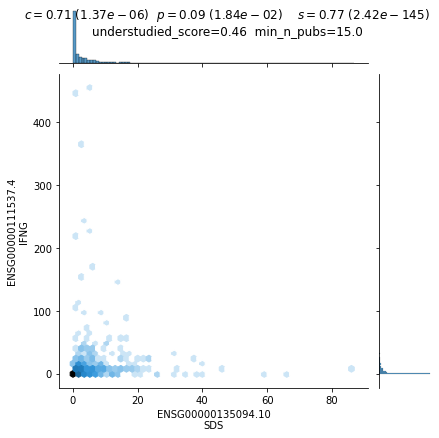

'Index: 1'

('ENSG00000130208.9', 'ENSG00000177606.6')

('APOC1', 'JUN')

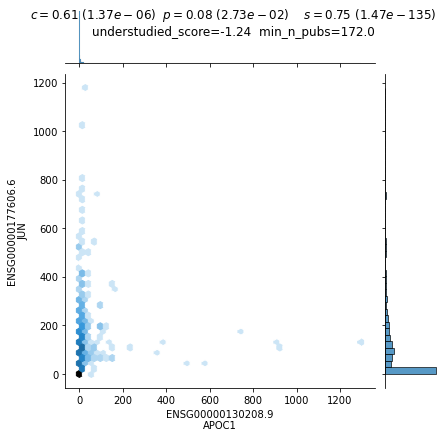

'Index: 2'

('ENSG00000130208.9', 'ENSG00000277632.1')

('APOC1', 'CCL3')

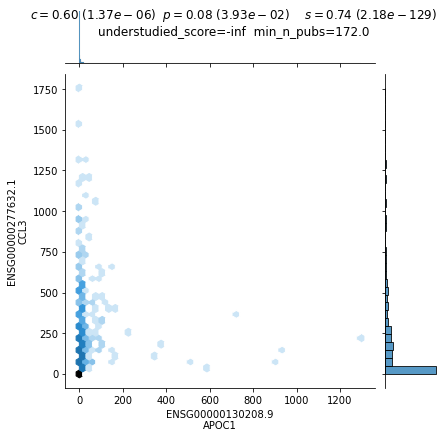

'Index: 3'

('ENSG00000130208.9', 'ENSG00000135245.9')

('APOC1', 'HILPDA')

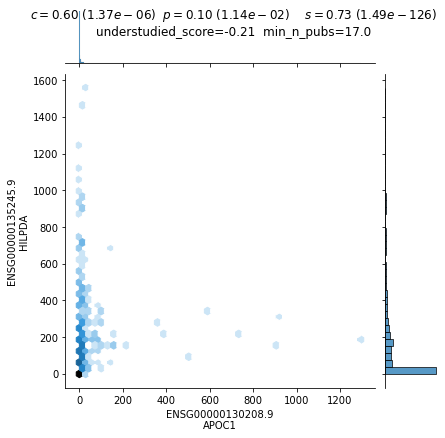

'Index: 4'

('ENSG00000124216.3', 'ENSG00000130208.9')

('SNAI1', 'APOC1')

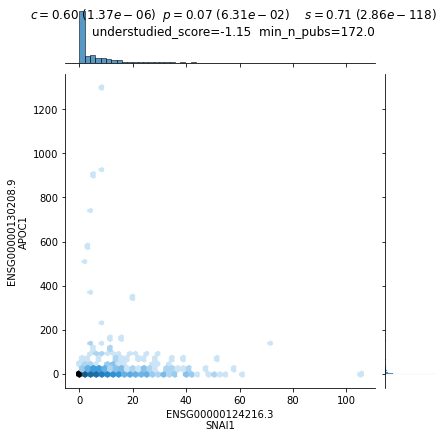

In [52]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting by top coefficient value and non-significant other p-value

In [53]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_pval = _tmp_df[_tmp_df[_coef_fdr_col_name] > 0.05]
display(_tmp_df_pval)

ccc   pearson  spearman  \
ENSG00000124216.3  ENSG00000130208.9   0.595734  0.071271  0.714580   
ENSG00000130208.9  ENSG00000128342.4   0.571408  0.054118  0.745569   
                   ENSG00000277089.4   0.571408  0.063461  0.716406   
                   ENSG00000123358.19  0.563412  0.074703  0.740589   
ENSG00000275385.1  ENSG00000124575.6   0.563412  0.052070  0.695650   
...                                         ...       ...       ...   
ENSG00000276900.1  ENSG00000163739.4   0.186508  0.067119  0.607281   
ENSG00000200320.1  ENSG00000081041.8   0.186508  0.063367  0.573666   
ENSG00000117632.22 ENSG00000211648.2   0.181940  0.070175  0.603269   
ENSG00000279744.1  ENSG00000081041.8   0.181940  0.041463  0.562903   
ENSG00000059573.8  ENSG00000239855.1   0.181940  0.062821  0.595165   

                                       clustermatch_rank  pearson_rank  \
ENSG00000124216.3  ENSG00000130208.9          12411221.0     2448712.0   
ENSG00000130208.9  ENSG00000128342.4          12367645.0     1908871.0   
                   ENSG00000277089.4          12367645.0     2206709.0   
                   ENSG00000123358.19         12350083.0     2552686.0   
ENSG00000275385.1  ENSG00000124575.6          12350083.0     1842692.0   
...                                                  ...           ...   
ENSG00000276900.1  ENSG00000163739.4           8855547.0     2320399.0   
ENSG00000200320.1  ENSG00000081041.8           8855547.0     2203716.0   
ENSG00000117632.22 ENSG00000211648.2           8771662.0     2414782.0   
ENSG00000279744.1  ENSG00000081041.8           8771662.0     1490098.0   
ENSG00000059573.8  ENSG00000239855.1           8771662.0     2186695.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000124216.3  ENSG00000130208.9      10570949.0  0.000001     0.063101   
ENSG00000130208.9  ENSG00000128342.4      10947698.0  0.000001     0.159204   
                   ENSG00000277089.4      10593167.0  0.000001     0.098184   
                   ENSG00000123358.19     10887410.0  0.000001     0.051438   
ENSG00000275385.1  ENSG00000124575.6      10340833.0  0.000001     0.175715   
...                                              ...       ...          ...   
ENSG00000276900.1  ENSG00000163739.4       9282524.0  0.000001     0.080177   
ENSG00000200320.1  ENSG00000081041.8       8880644.0  0.000001     0.098672   
ENSG00000117632.22 ENSG00000211648.2       9234621.0  0.000001     0.067267   
ENSG00000279744.1  ENSG00000081041.8       8750211.0  0.000001     0.282869   
ENSG00000059573.8  ENSG00000239855.1       9137702.0  0.000001     0.101655   

                                        spearman_fdr  understudied_score  \
ENSG00000124216.3  ENSG00000130208.9   2.862314e-118           -1.154403   
ENSG00000130208.9  ENSG00000128342.4   4.481972e-134           -0.535744   
                   ENSG00000277089.4   3.846959e-119                -inf   
                   ENSG00000123358.19  2.209714e-131           -0.122590   
ENSG00000275385.1  ENSG00000124575.6   1.256729e-109                -inf   
...                                              ...                 ...   
ENSG00000276900.1  ENSG00000163739.4    8.769101e-77                -inf   
ENSG00000200320.1  ENSG00000081041.8    7.615198e-67                -inf   
ENSG00000117632.22 ENSG00000211648.2    1.555203e-75                -inf   
ENSG00000279744.1  ENSG00000081041.8    6.655665e-64                -inf   
ENSG00000059573.8  ENSG00000239855.1    4.599831e-73            0.133881   

                                       min_n_pubs  
ENSG00000124216.3  ENSG00000130208.9        172.0  
ENSG00000130208.9  ENSG00000128342.4        166.0  
                   ENSG00000277089.4        172.0  
                   ENSG00000123358.19       172.0  
ENSG00000275385.1  ENSG00000124575.6          inf  
...                                           ...  
ENSG00000276900.1  ENSG00000163739.4        187.0  
ENSG00000200320.1  ENSG0

'Index: 0'

('ENSG00000124216.3', 'ENSG00000130208.9')

('SNAI1', 'APOC1')

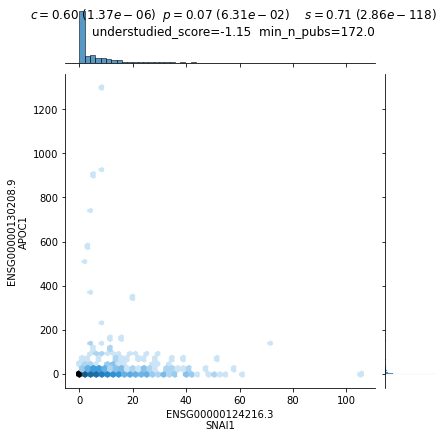

'Index: 1'

('ENSG00000130208.9', 'ENSG00000128342.4')

('APOC1', 'LIF')

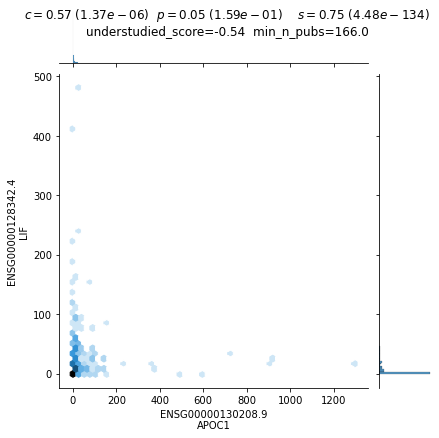

'Index: 2'

('ENSG00000130208.9', 'ENSG00000277089.4')

('APOC1', 'AC069363.1')

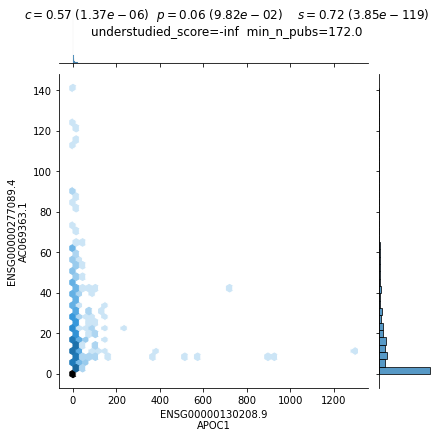

'Index: 3'

('ENSG00000130208.9', 'ENSG00000123358.19')

('APOC1', 'NR4A1')

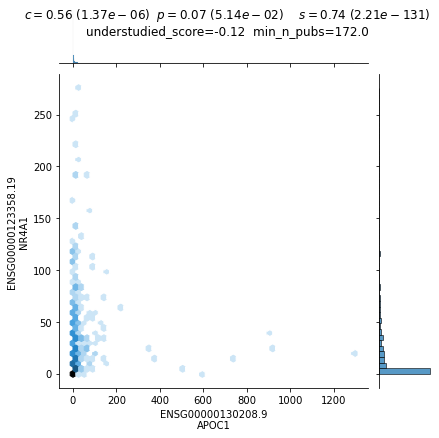

'Index: 4'

('ENSG00000275385.1', 'ENSG00000124575.6')

('CCL18', 'HIST1H1D')

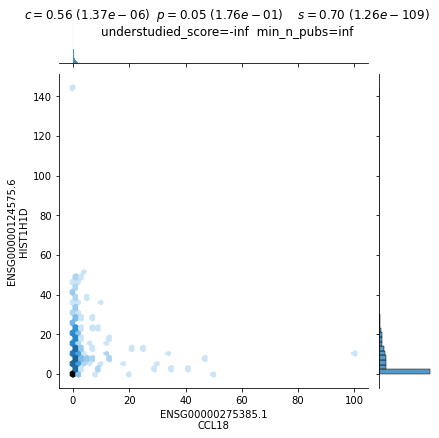

In [54]:
for i in range(min(_tmp_df_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting non-significant other p-value

In [55]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_other_pval = _tmp_df[_tmp_df[_coef_fdr_col_name] > 0.05].sort_values(
    _coef_fdr_col_name, ascending=False
)
display(_tmp_df_other_pval)

ccc   pearson  spearman  \
ENSG00000136235.15 ENSG00000234906.9   0.301209  0.000464  0.590650   
ENSG00000130649.9  ENSG00000166920.12  0.312986  0.002225  0.625346   
ENSG00000275385.1  ENSG00000111537.4   0.501466  0.003166  0.688883   
ENSG00000115009.11 ENSG00000133067.17  0.301209  0.004325  0.564003   
                   ENSG00000209582.1   0.283966  0.004360  0.599321   
...                                         ...       ...       ...   
ENSG00000275385.1  ENSG00000130222.10  0.509012  0.074805  0.665978   
ENSG00000177674.15 ENSG00000068976.13  0.381776  0.074856  0.703913   
ENSG00000275385.1  ENSG00000151929.9   0.479164  0.074892  0.701412   
ENSG00000133800.8  ENSG00000109466.13  0.212632  0.074919  0.615885   
ENSG00000265625.1  ENSG00000130208.9   0.422164  0.075029  0.626234   

                                       clustermatch_rank  pearson_rank  \
ENSG00000136235.15 ENSG00000234906.9          10535742.5       17083.0   
ENSG00000130649.9  ENSG00000166920.12         10673339.5       81758.0   
ENSG00000275385.1  ENSG00000111537.4          12151145.5      116646.0   
ENSG00000115009.11 ENSG00000133067.17         10535742.5      159676.0   
                   ENSG00000209582.1          10323828.0      161000.0   
...                                                  ...           ...   
ENSG00000275385.1  ENSG00000130222.10         12182238.5     2555793.0   
ENSG00000177674.15 ENSG00000068976.13         11371920.0     2557324.0   
ENSG00000275385.1  ENSG00000151929.9          12047375.5     2558429.0   
ENSG00000133800.8  ENSG00000109466.13          9302298.5     2559232.0   
ENSG00000265625.1  ENSG00000130208.9          11698092.5     2562635.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000136235.15 ENSG00000234906.9       9084062.0  0.000001     0.990442   
ENSG00000130649.9  ENSG00000166920.12      9496746.0  0.000001     0.955509   
ENSG00000275385.1  ENSG00000111537.4      10258957.0  0.000001     0.937000   
ENSG00000115009.11 ENSG00000133067.17      8763617.0  0.000001     0.913983   
                   ENSG00000209582.1       9187790.0  0.000001     0.913436   
...                                              ...       ...          ...   
ENSG00000275385.1  ENSG00000130222.10      9982361.0  0.000001     0.051096   
ENSG00000177674.15 ENSG00000068976.13     10441230.0  0.000001     0.050937   
ENSG00000275385.1  ENSG00000151929.9      10410703.0  0.000001     0.050820   
ENSG00000133800.8  ENSG00000109466.13      9384740.0  0.000001     0.050743   
ENSG00000265625.1  ENSG00000130208.9       9507303.0  0.000001     0.050409   

                                        spearman_fdr  understudied_score  \
ENSG00000136235.15 ENSG00000234906.9    1.016960e-71            0.311428   
ENSG00000130649.9  ENSG00000166920.12   1.213538e-82                -inf   
ENSG00000275385.1  ENSG00000111537.4   1.075978e-106                -inf   
ENSG00000115009.11 ENSG00000133067.17   3.368544e-64            0.109556   
                   ENSG00000209582.1    2.541040e-74           -0.453254   
...                                              ...                 ...   
ENSG00000275385.1  ENSG00000130222.10   2.430222e-97           -0.244704   
ENSG00000177674.15 ENSG00000068976.13  2.546328e-113           -0.275805   
ENSG00000275385.1  ENSG00000151929.9   3.424113e-112           -0.576042   
ENSG00000133800.8  ENSG00000109466.13   1.585431e-79            0.291499   
ENSG00000265625.1  ENSG00000130208.9    6.114829e-83                -inf   

                                       min_n_pubs  
ENSG00000136235.15 ENSG00000234906.9         60.0  
ENSG00000130649.9  ENSG00000166920.12         inf  
ENSG00000275385.1  ENSG00000111537.4       1619.0  
ENSG00000115009.11 ENSG00000133067.17        14.0  
                   ENSG00000209582.1        185.0  
...                                           ...  
ENSG00000275385.1  ENSG00000130222.10        53.0  
ENSG00000177674.15 ENSG0

'Index: 0'

('ENSG00000136235.15', 'ENSG00000234906.9')

('GPNMB', 'APOC2')

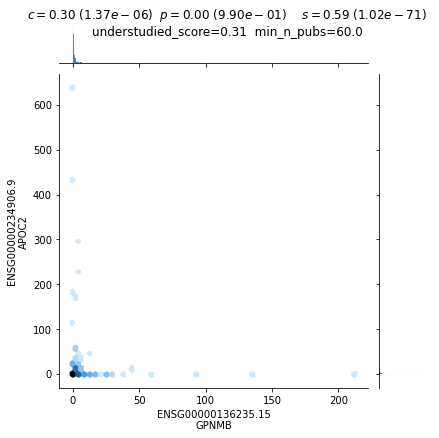

'Index: 1'

('ENSG00000130649.9', 'ENSG00000166920.12')

('CYP2E1', 'C15orf48')

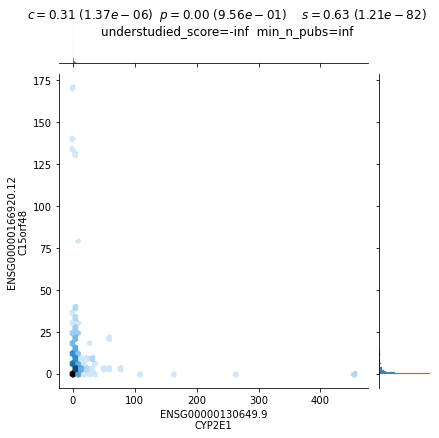

'Index: 2'

('ENSG00000275385.1', 'ENSG00000111537.4')

('CCL18', 'IFNG')

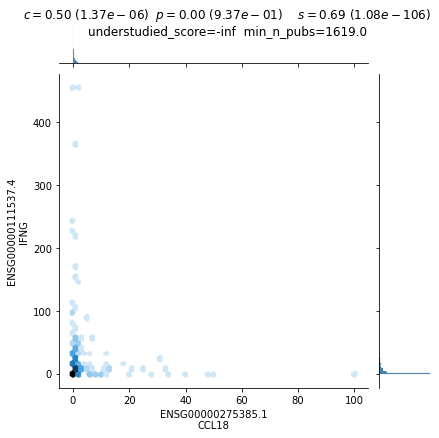

'Index: 3'

('ENSG00000115009.11', 'ENSG00000133067.17')

('CCL20', 'LGR6')

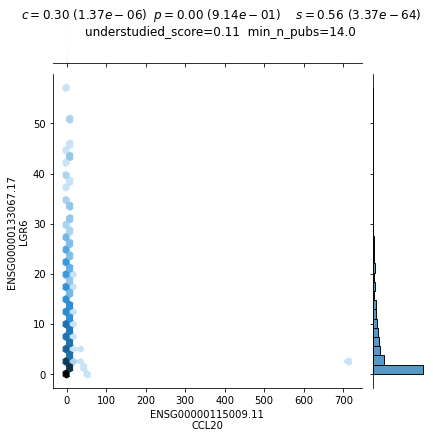

'Index: 4'

('ENSG00000115009.11', 'ENSG00000209582.1')

('CCL20', 'SNORA48')

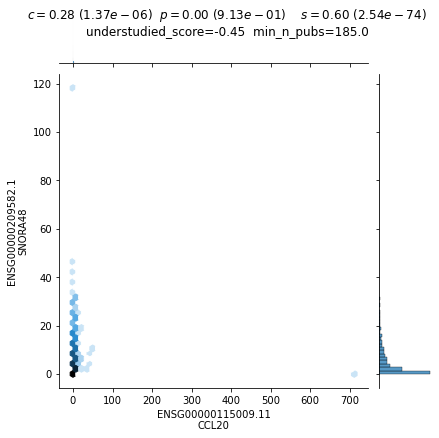

In [56]:
for i in range(min(_tmp_df_other_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_other_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [57]:
gene_pair_subset = "c_rs_vs_r"

#### Initial selection

Initial (first manuscript submission) gene pair selection considering coefficient values only (but not their p-value):

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_rs_vs_r-SDS_vs_IFNG.svg')

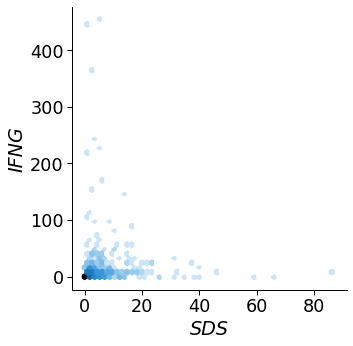

In [58]:
gene0_id = "ENSG00000135094.10"
gene1_id = "ENSG00000111537.4"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [59]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.9999999999999996,
 'pearson': 0.24999999999999992,
 'spearman': 0.8999999999999996}

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_rs_vs_r-APOC1_vs_JUN.svg')

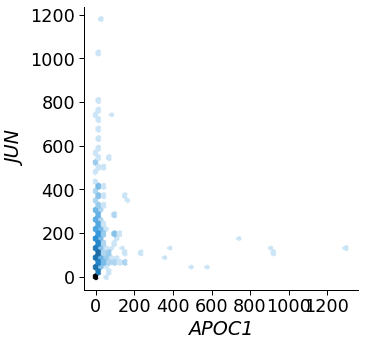

In [60]:
gene0_id = "ENSG00000130208.9"
gene1_id = "ENSG00000177606.6"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [61]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.9999999999999996,
 'pearson': 0.22999999999999995,
 'spearman': 0.8799999999999996}

#### Second selection

Second (after first revision) gene pair selection, which considers both coefficient values and p-value.

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_rs_vs_r-APOC1_vs_LIF.svg')

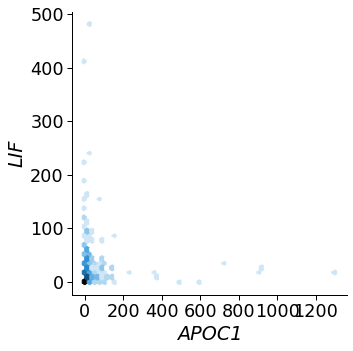

In [62]:
gene0_id = "ENSG00000130208.9"
gene1_id = "ENSG00000128342.4"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [63]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.9899999999999995,
 'pearson': 0.15999999999999998,
 'spearman': 0.8799999999999996}

## CCC vs Pearson

In [64]:
_coef_fdr_col_name = "pearson_fdr"

In [65]:
_tmp_df = get_gene_pairs(
    "ccc",
    {
        "Clustermatch (high)",
        "Pearson (low)",
    },
)

save_gene_pairs(_tmp_df, "clustermatch_vs_pearson")

display(_tmp_df.shape)
display(_tmp_df)

(20951, 11)

ccc   pearson  spearman  \
ENSG00000124659.6  ENSG00000111537.4   0.468202  0.076129  0.544895   
ENSG00000236409.1  ENSG00000149257.13  0.460965  0.111842  0.540108   
ENSG00000275385.1  ENSG00000160446.18  0.446659  0.099853  0.560171   
ENSG00000236409.1  ENSG00000151929.9   0.439590  0.096174  0.502060   
ENSG00000139278.9  ENSG00000111537.4   0.439590  0.096601  0.532489   
...                                         ...       ...       ...   
ENSG00000182853.11 ENSG00000176083.17  0.181940  0.075223  0.495197   
                   ENSG00000125780.11  0.181940  0.063719  0.478540   
                   ENSG00000113905.4   0.181940  0.022184  0.495017   
                   ENSG00000105205.6   0.181940  0.038582  0.493528   
ENSG00000105486.13 ENSG00000234906.9   0.181940  0.019610  0.472049   

                                       clustermatch_rank  pearson_rank  \
ENSG00000124659.6  ENSG00000111537.4          11989835.0     2595765.0   
ENSG00000236409.1  ENSG00000149257.13         11949532.0     3594819.0   
ENSG00000275385.1  ENSG00000160446.18         11863840.5     3274368.0   
ENSG00000236409.1  ENSG00000151929.9          11817984.0     3173235.0   
ENSG00000139278.9  ENSG00000111537.4          11817984.0     3184937.0   
...                                                  ...           ...   
ENSG00000182853.11 ENSG00000176083.17          8771662.0     2568502.0   
                   ENSG00000125780.11          8771662.0     2214826.0   
                   ENSG00000113905.4           8771662.0      815462.0   
                   ENSG00000105205.6           8771662.0     1392729.0   
ENSG00000105486.13 ENSG00000234906.9           8771662.0      722578.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000124659.6  ENSG00000111537.4       8531829.0  0.000001     0.047159   
ENSG00000236409.1  ENSG00000149257.13      8473305.0  0.000001     0.003633   
ENSG00000275385.1  ENSG00000160446.18      8717179.0  0.000001     0.009325   
ENSG00000236409.1  ENSG00000151929.9       8003678.0  0.000001     0.012227   
ENSG00000139278.9  ENSG00000111537.4       8380146.0  0.000001     0.011862   
...                                              ...       ...          ...   
ENSG00000182853.11 ENSG00000176083.17      7918125.0       NaN          NaN   
                   ENSG00000125780.11      7708445.0       NaN          NaN   
                   ENSG00000113905.4       7915797.0       NaN          NaN   
                   ENSG00000105205.6       7897136.0       NaN          NaN   
ENSG00000105486.13 ENSG00000234906.9       7625541.0       NaN          NaN   

                                       spearman_fdr  understudied_score  \
ENSG00000124659.6  ENSG00000111537.4   2.910920e-59                -inf   
ENSG00000236409.1  ENSG00000149257.13  4.605633e-58            0.072890   
ENSG00000275385.1  ENSG00000160446.18  3.237273e-63            0.187653   
ENSG00000236409.1  ENSG00000151929.9   3.571766e-49           -0.576042   
ENSG00000139278.9  ENSG00000111537.4   3.421468e-56            0.002336   
...                                             ...                 ...   
ENSG00000182853.11 ENSG00000176083.17           NaN            0.570177   
                   ENSG00000125780.11           NaN            0.570177   
                   ENSG00000113905.4            NaN            0.570177   
                   ENSG00000105205.6            NaN            0.570177   
ENSG00000105486.13 ENSG00000234906.9            NaN           -0.263550   

                                       min_n_pubs  
ENSG00000124659.6  ENSG00000111537.4       1619.0  
ENSG00000236409.1  ENSG00000149257.13       110.0  
ENSG00000275385.1  ENSG00000160446.18        11.0  
ENSG00000236409.1  ENSG00000151929.9        153.0  
ENSG00000139278.9  ENSG00000111537.4         32.0  
...                                           ...  
ENSG00000182853.11 ENSG00000176083.17         8.0  
                   ENSG00000125780.1

### Preview sorting by top coefficient value only

'Index: 0'

('ENSG00000124659.6', 'ENSG00000111537.4')

('TBCC', 'IFNG')

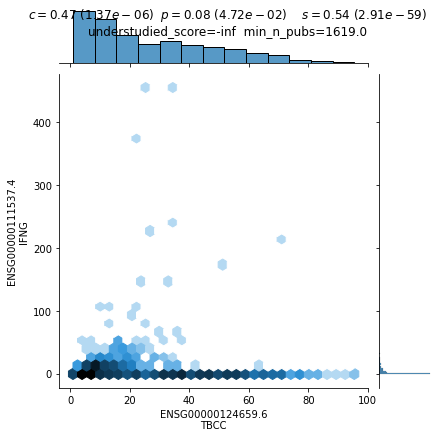

'Index: 1'

('ENSG00000236409.1', 'ENSG00000149257.13')

('NRADDP', 'SERPINH1')

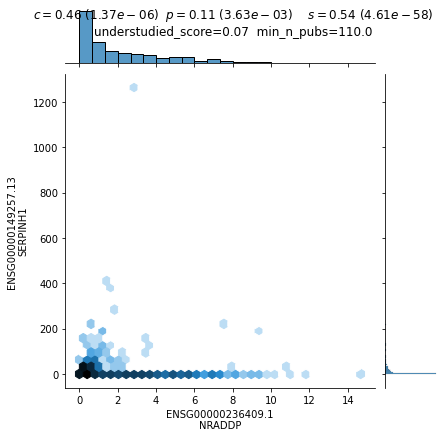

'Index: 2'

('ENSG00000275385.1', 'ENSG00000160446.18')

('CCL18', 'ZDHHC12')

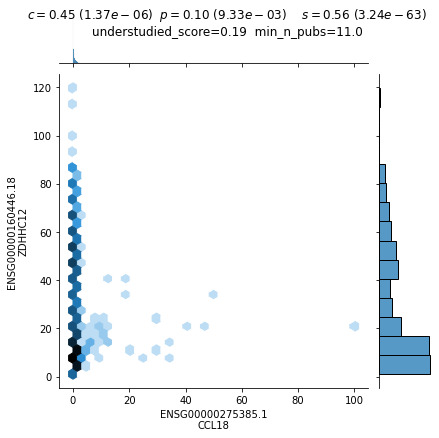

'Index: 3'

('ENSG00000236409.1', 'ENSG00000151929.9')

('NRADDP', 'BAG3')

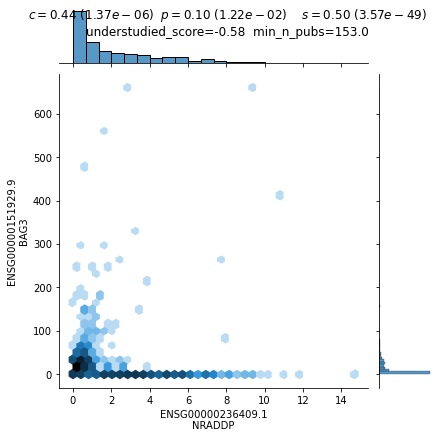

'Index: 4'

('ENSG00000139278.9', 'ENSG00000111537.4')

('GLIPR1', 'IFNG')

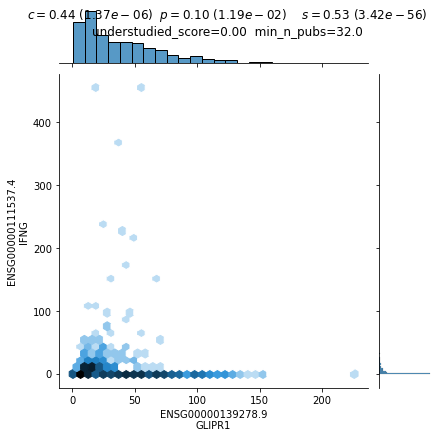

In [66]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting by top coefficient value and non-significant other p-value

In [67]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_pval = _tmp_df[
    (_tmp_df[_coef_fdr_col_name] > 0.05)
]  # .sort_values("spearman_fdr", ascending=False)
display(_tmp_df_pval)

ccc   pearson  spearman  \
ENSG00000125735.10 ENSG00000149257.13  0.425621  0.070136  0.482154   
ENSG00000236409.1  ENSG00000106211.8   0.418721  0.025810  0.539124   
ENSG00000079257.7  ENSG00000111537.4   0.418721  0.029649  0.539287   
ENSG00000275385.1  ENSG00000178226.10  0.405090  0.068103  0.561804   
ENSG00000272155.1  ENSG00000111537.4   0.391683  0.060977  0.512495   
...                                         ...       ...       ...   
ENSG00000275385.1  ENSG00000125520.13  0.181940  0.063061  0.505409   
ENSG00000101096.19 ENSG00000211976.2   0.181940  0.004334  0.562087   
ENSG00000198467.13 ENSG00000211943.2   0.181940  0.014430  0.491444   
ENSG00000198276.15 ENSG00000105697.7   0.181940  0.020385  0.490441   
ENSG00000139194.7  ENSG00000163659.12  0.181940  0.071915  0.560444   

                                       clustermatch_rank  pearson_rank  \
ENSG00000125735.10 ENSG00000149257.13         11722743.0     2413611.0   
ENSG00000236409.1  ENSG00000106211.8          11672987.0      945528.0   
ENSG00000079257.7  ENSG00000111537.4          11672987.0     1082557.0   
ENSG00000275385.1  ENSG00000178226.10         11568281.0     2350911.0   
ENSG00000272155.1  ENSG00000111537.4          11457719.5     2128431.0   
...                                                  ...           ...   
ENSG00000275385.1  ENSG00000125520.13          8771662.0     2194209.0   
ENSG00000101096.19 ENSG00000211976.2           8771662.0      159982.0   
ENSG00000198467.13 ENSG00000211943.2           8771662.0      533264.0   
ENSG00000198276.15 ENSG00000105697.7           8771662.0      750491.0   
ENSG00000139194.7  ENSG00000163659.12          8771662.0     2468325.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000125735.10 ENSG00000149257.13      7754078.0  0.000001     0.067419   
ENSG00000236409.1  ENSG00000106211.8       8461218.0  0.000001     0.508033   
ENSG00000079257.7  ENSG00000111537.4       8463186.0  0.000001     0.445878   
ENSG00000275385.1  ENSG00000178226.10      8736915.0  0.000001     0.075887   
ENSG00000272155.1  ENSG00000111537.4       8133783.0  0.000001     0.112244   
...                                              ...       ...          ...   
ENSG00000275385.1  ENSG00000125520.13      8045828.0  0.000001     0.100338   
ENSG00000101096.19 ENSG00000211976.2       8740246.0  0.000001     0.913928   
ENSG00000198467.13 ENSG00000211943.2       7871094.0  0.000001     0.714095   
ENSG00000198276.15 ENSG00000105697.7       7858656.0  0.000001     0.602861   
ENSG00000139194.7  ENSG00000163659.12      8720403.0  0.000001     0.060748   

                                       spearman_fdr  understudied_score  \
ENSG00000125735.10 ENSG00000149257.13  6.046701e-45            0.072890   
ENSG00000236409.1  ENSG00000106211.8   8.076420e-58           -0.541574   
ENSG00000079257.7  ENSG00000111537.4   7.357575e-58            0.313441   
ENSG00000275385.1  ENSG00000178226.10  1.264726e-63            0.339836   
ENSG00000272155.1  ENSG00000111537.4   1.675428e-51                -inf   
...                                             ...                 ...   
ENSG00000275385.1  ENSG00000125520.13  6.513031e-50            0.112330   
ENSG00000101096.19 ENSG00000211976.2   1.073909e-63           -0.610084   
ENSG00000198467.13 ENSG00000211943.2   6.961469e-47            0.134047   
ENSG00000198276.15 ENSG00000105697.7   1.134073e-46                -inf   
ENSG00000139194.7  ENSG00000163659.12  2.773917e-63            0.374593   

                                       min_n_pubs  
ENSG00000125735.10 ENSG00000149257.13        86.0  
ENSG00000236409.1  ENSG00000106211.8        458.0  
ENSG00000079257.7  ENSG00000111537.4         17.0  
ENSG00000275385.1  ENSG00000178226.10         5.0  
ENSG00000272155.1  ENSG00000111537.4       1619.0  
...                                           ...  
ENSG00000275385.1  ENSG00000125520.13        15.0  
ENSG00000101096.19 ENSG00000211976.2

'Index: 0'

('ENSG00000125735.10', 'ENSG00000149257.13')

('TNFSF14', 'SERPINH1')

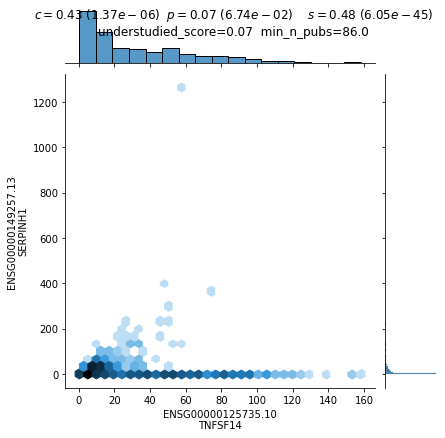

'Index: 1'

('ENSG00000236409.1', 'ENSG00000106211.8')

('NRADDP', 'HSPB1')

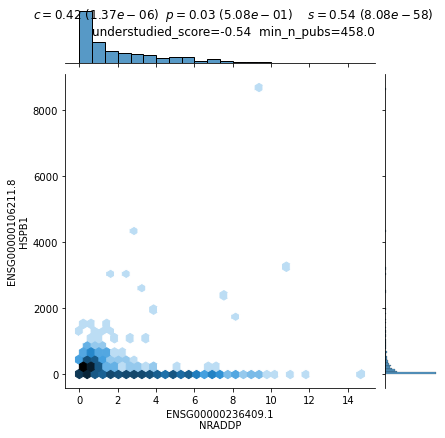

'Index: 2'

('ENSG00000079257.7', 'ENSG00000111537.4')

('LXN', 'IFNG')

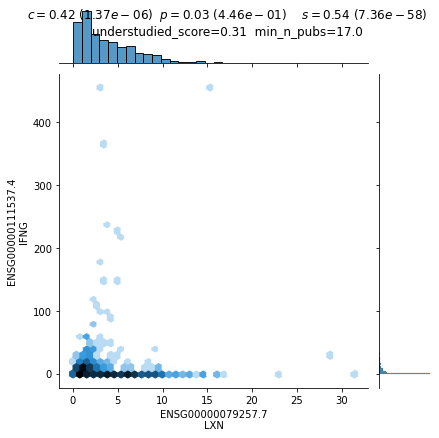

'Index: 3'

('ENSG00000275385.1', 'ENSG00000178226.10')

('CCL18', 'PRSS36')

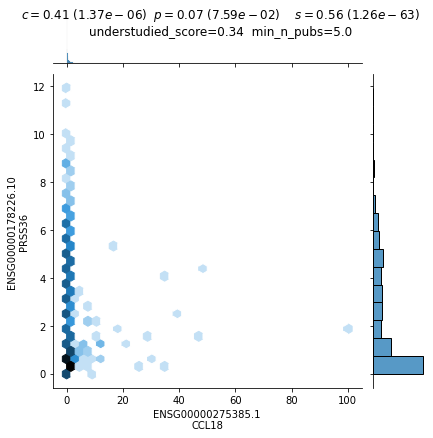

'Index: 4'

('ENSG00000272155.1', 'ENSG00000111537.4')

('RP11-707M3.3', 'IFNG')

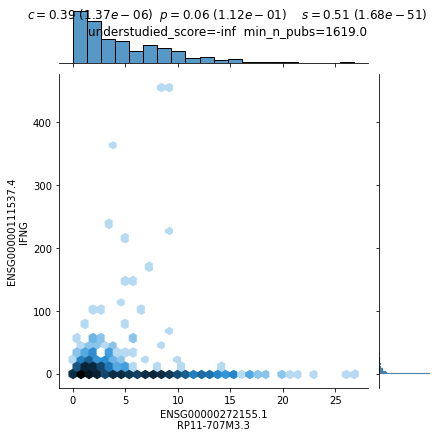

'Index: 5'

('ENSG00000275385.1', 'ENSG00000114383.9')

('CCL18', 'TUSC2')

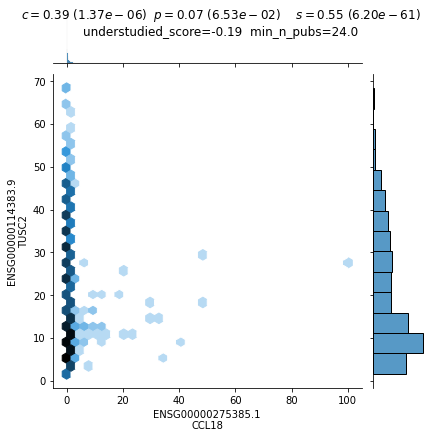

'Index: 6'

('ENSG00000275385.1', 'ENSG00000169612.3')

('CCL18', 'FAM103A1')

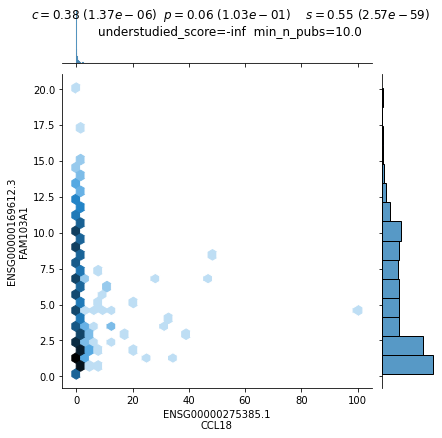

'Index: 7'

('ENSG00000275385.1', 'ENSG00000272086.1')

('CCL18', 'CTD-2186M15.3')

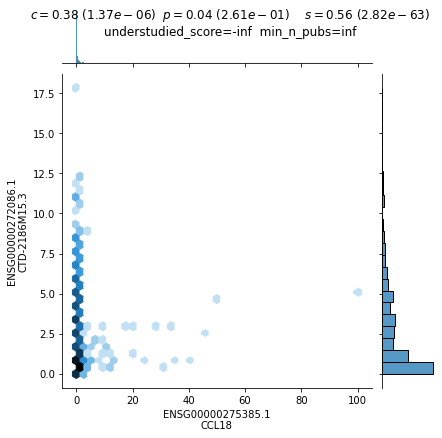

'Index: 8'

('ENSG00000079257.7', 'ENSG00000149257.13')

('LXN', 'SERPINH1')

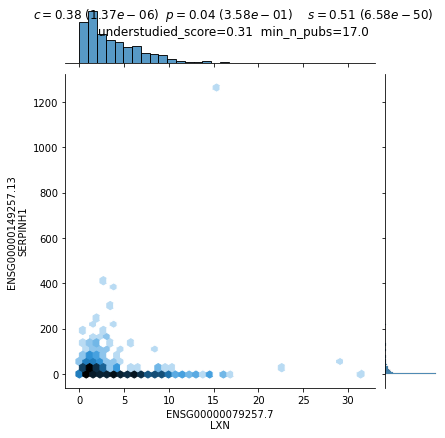

'Index: 9'

('ENSG00000275385.1', 'ENSG00000164023.14')

('CCL18', 'SGMS2')

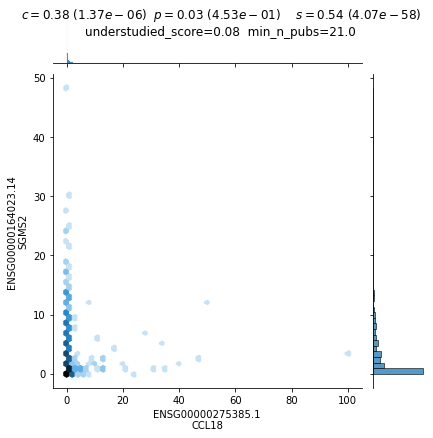

In [68]:
for i in range(min(_tmp_df_pval.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting non-significant other p-value

In [69]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_other_pval = _tmp_df[_tmp_df[_coef_fdr_col_name] > 0.05].sort_values(
    _coef_fdr_col_name, ascending=False
)
display(_tmp_df_other_pval)

ccc   pearson  spearman  \
ENSG00000243811.8  ENSG00000111057.10  0.191131  0.000073  0.512970   
ENSG00000149294.16 ENSG00000115009.11  0.272752  0.000283  0.551771   
ENSG00000142945.12 ENSG00000158874.11  0.225069  0.000432  0.534545   
ENSG00000158825.5  ENSG00000130598.15  0.200547  0.000901  0.560100   
ENSG00000115009.11 ENSG00000115085.13  0.191131  0.000898  0.482724   
...                                         ...       ...       ...   
ENSG00000254288.1  ENSG00000120694.19  0.340305  0.075069  0.538208   
ENSG00000170442.11 ENSG00000110245.11  0.195811  0.075077  0.543358   
ENSG00000139194.7  ENSG00000137492.7   0.186508  0.075093  0.561654   
ENSG00000087157.18 ENSG00000128342.4   0.217565  0.075116  0.428535   
ENSG00000109956.12 ENSG00000186652.9   0.267229  0.075126  0.545321   

                                       clustermatch_rank  pearson_rank  \
ENSG00000243811.8  ENSG00000111057.10          8938670.5        2721.0   
ENSG00000149294.16 ENSG00000115009.11         10179166.5       10355.0   
ENSG00000142945.12 ENSG00000158874.11          9500424.0       15861.0   
ENSG00000158825.5  ENSG00000130598.15          9101685.0       33358.0   
ENSG00000115009.11 ENSG00000115085.13          8938670.5       33251.0   
...                                                  ...           ...   
ENSG00000254288.1  ENSG00000120694.19         10972359.5     2563870.0   
ENSG00000170442.11 ENSG00000110245.11          9020483.0     2564137.0   
ENSG00000139194.7  ENSG00000137492.7           8855547.0     2564656.0   
ENSG00000087157.18 ENSG00000128342.4           9382134.0     2565336.0   
ENSG00000109956.12 ENSG00000186652.9          10106099.5     2565637.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000243811.8  ENSG00000111057.10      8139647.0  0.000001     0.998512   
ENSG00000149294.16 ENSG00000115009.11      8615229.0  0.000001     0.994117   
ENSG00000142945.12 ENSG00000158874.11      8405493.0  0.000001     0.991050   
ENSG00000158825.5  ENSG00000130598.15      8716326.0  0.000001     0.981744   
ENSG00000115009.11 ENSG00000115085.13      7761294.0  0.000001     0.981744   
...                                              ...       ...          ...   
ENSG00000254288.1  ENSG00000120694.19      8450070.0  0.000001     0.050288   
ENSG00000170442.11 ENSG00000110245.11      8512998.0  0.000001     0.050268   
ENSG00000139194.7  ENSG00000137492.7       8735137.0  0.000001     0.050222   
ENSG00000087157.18 ENSG00000128342.4       7062629.0  0.000001     0.050149   
ENSG00000109956.12 ENSG00000186652.9       8536977.0  0.000001     0.050123   

                                       spearman_fdr  understudied_score  \
ENSG00000243811.8  ENSG00000111057.10  1.306598e-51            0.002214   
ENSG00000149294.16 ENSG00000115009.11  5.090980e-61           -0.453254   
ENSG00000142945.12 ENSG00000158874.11  1.083439e-56            0.105527   
ENSG00000158825.5  ENSG00000130598.15  3.365881e-63            0.027544   
ENSG00000115009.11 ENSG00000115085.13  4.619861e-45           -0.453254   
...                                             ...                 ...   
ENSG00000254288.1  ENSG00000120694.19  1.361717e-57            0.174128   
ENSG00000170442.11 ENSG00000110245.11  7.096676e-59           -0.253707   
ENSG00000139194.7  ENSG00000137492.7   1.381948e-63                -inf   
ENSG00000087157.18 ENSG00000128342.4   7.805137e-35            0.325983   
ENSG00000109956.12 ENSG00000186652.9   2.271069e-59           -0.160175   

                                       min_n_pubs  
ENSG00000243811.8  ENSG00000111057.10        33.0  
ENSG00000149294.16 ENSG00000115009.11       185.0  
ENSG00000142945.12 ENSG00000158874.11       105.0  
ENSG00000158825.5  ENSG00000130598.15        38.0  
ENSG00000115009.11 ENSG00000115085.13       185.0  
...                                           ...  
ENSG00000254288.1  ENSG00000120694.19        72.0  
ENSG00000170442.11 ENSG00000110245.1

'Index: 0'

('ENSG00000243811.8', 'ENSG00000111057.10')

('APOBEC3D', 'KRT18')

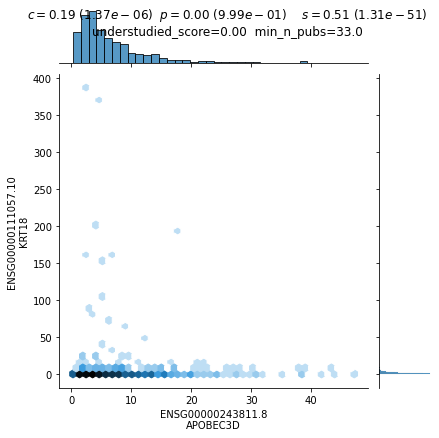

'Index: 1'

('ENSG00000149294.16', 'ENSG00000115009.11')

('NCAM1', 'CCL20')

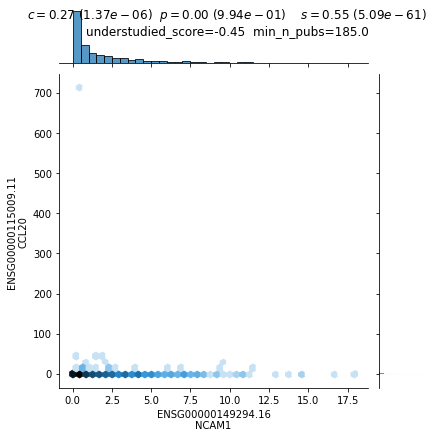

'Index: 2'

('ENSG00000142945.12', 'ENSG00000158874.11')

('KIF2C', 'APOA2')

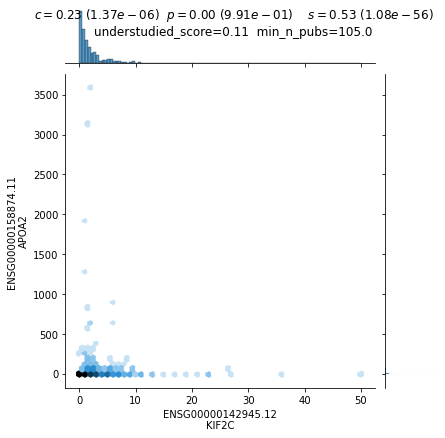

'Index: 3'

('ENSG00000158825.5', 'ENSG00000130598.15')

('CDA', 'TNNI2')

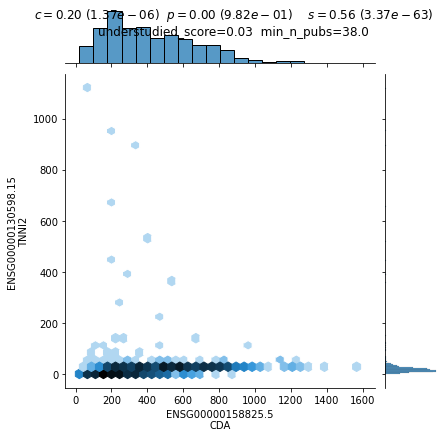

'Index: 4'

('ENSG00000115009.11', 'ENSG00000115085.13')

('CCL20', 'ZAP70')

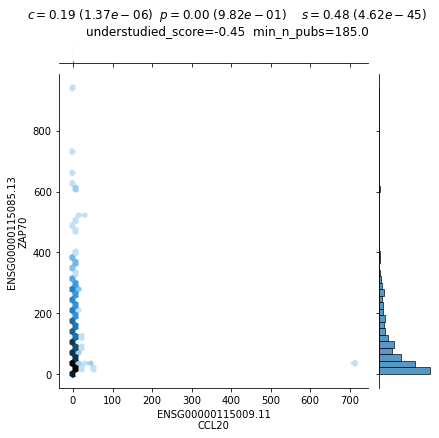

In [70]:
for i in range(min(_tmp_df_other_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_other_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [71]:
gene_pair_subset = "c_vs_r"

#### Initial selection

Initial (first manuscript submission) gene pair selection considering coefficient values only (but not their p-value):

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_r-CCL18_vs_ZDHHC12.svg')

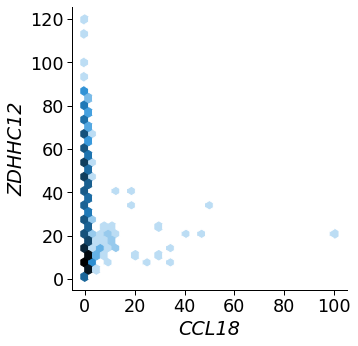

In [72]:
gene0_id = "ENSG00000275385.1"
gene1_id = "ENSG00000160446.18"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [73]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.9499999999999995,
 'pearson': 0.2699999999999999,
 'spearman': 0.6999999999999996}

#### Second selection

Second (after first revision) gene pair selection, which considers both coefficient values and p-value.

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_r-CCL18_vs_PRSS36.svg')

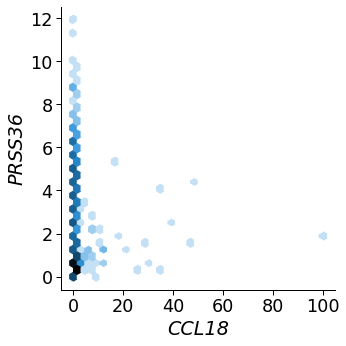

In [74]:
gene0_id = "ENSG00000275385.1"
gene1_id = "ENSG00000178226.10"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [75]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.9299999999999996,
 'pearson': 0.18999999999999995,
 'spearman': 0.6999999999999996}

## CCC vs Spearman

In [76]:
_coef_fdr_col_name = "spearman_fdr"

In [77]:
_tmp_df = get_gene_pairs(
    "ccc",
    {
        "Clustermatch (high)",
        "Spearman (low)",
    },
)

save_gene_pairs(_tmp_df, "clustermatch_vs_spearman")

display(_tmp_df.shape)
display(_tmp_df)

(28, 11)

ccc   pearson  spearman  \
ENSG00000147050.14 ENSG00000183878.15  0.294391  0.239870  0.100621   
ENSG00000115165.9  ENSG00000235750.9   0.205803  0.158792  0.110038   
                   ENSG00000101265.15  0.201962  0.156060  0.107882   
ENSG00000198034.10 ENSG00000099725.14  0.198590  0.361447  0.197205   
ENSG00000147050.14 ENSG00000067048.16  0.193557  0.237462  0.035350   
ENSG00000137275.13 ENSG00000100226.15  0.193464  0.171169  0.196367   
ENSG00000064666.14 ENSG00000100226.15  0.193464  0.169898  0.189400   
ENSG00000107771.15 ENSG00000174151.14  0.193464  0.211882  0.190765   
ENSG00000196663.15 ENSG00000100226.15  0.193464  0.149426  0.191243   
ENSG00000167378.8  ENSG00000174151.14  0.193464  0.195318  0.181863   
ENSG00000115165.9  ENSG00000105514.7   0.192490  0.237330  0.176075   
ENSG00000255139.1  ENSG00000101265.15  0.190994  0.165878  0.187627   
ENSG00000115165.9  ENSG00000160785.13  0.190192  0.150949  0.098379   
                   ENSG00000241878.11  0.190023  0.241985  0.182072   
ENSG00000140455.16 ENSG00000100226.15  0.188812  0.179639  0.196454   
ENSG00000142599.17 ENSG00000100226.15  0.188812  0.165703  0.194947   
ENSG00000171608.15 ENSG00000100226.15  0.188812  0.171990  0.199252   
ENSG00000107771.15 ENSG00000185905.3   0.188812  0.247591  0.199203   
ENSG00000115165.9  ENSG00000197324.8   0.184938  0.208519  0.172818   
ENSG00000129925.10 ENSG00000100226.15  0.184217  0.154006  0.181951   
ENSG00000059804.15 ENSG00000174125.7   0.184217  0.136732  0.195543   
ENSG00000167378.8  ENSG00000143412.9   0.184217  0.201746  0.189370   
ENSG00000110057.7  ENSG00000100226.15  0.184217  0.166148  0.198736   
ENSG00000198001.13 ENSG00000100226.15  0.184217  0.197282  0.195093   
ENSG00000205045.8  ENSG00000130772.13  0.184217  0.200673  0.194881   
ENSG00000005379.15 ENSG00000174151.14  0.184217  0.166414  0.181505   
ENSG00000168887.10 ENSG00000227782.2   0.181940  0.125835  0.187428   
ENSG00000107771.15 ENSG00000166272.16  0.181940  0.250624  0.198440   

                                       clustermatch_rank  pearson_rank  \
ENSG00000147050.14 ENSG00000183878.15         10436674.0     6265429.0   
ENSG00000115165.9  ENSG00000235750.9           9212181.0     4717121.0   
                   ENSG00000101265.15          9132185.0     4656609.0   
ENSG00000198034.10 ENSG00000099725.14          9071073.0     7945595.0   
ENSG00000147050.14 ENSG00000067048.16          8989374.0     6225427.0   
ENSG00000137275.13 ENSG00000100226.15          8979610.0     4982770.0   
ENSG00000064666.14 ENSG00000100226.15          8979610.0     4955926.0   
ENSG00000107771.15 ENSG00000174151.14          8979610.0     5780311.0   
ENSG00000196663.15 ENSG00000100226.15          8979610.0     4508364.0   
ENSG00000167378.8  ENSG00000174151.14          8979610.0     5469516.0   
ENSG00000115165.9  ENSG00000105514.7           8969241.0     6223245.0   
ENSG00000255139.1  ENSG00000101265.15          8909722.0     4870717.0   
ENSG00000115165.9  ENSG00000160785.13          8908908.0     4542698.0   
                   ENSG00000241878.11          8908632.5     6300106.0   
ENSG00000140455.16 ENSG00000100226.15          8897293.5     5158131.0   
ENSG00000142599.17 ENSG00000100226.15          8897293.5     4866996.0   
ENSG00000171608.15 ENSG00000100226.15          8897293.5     5000114.0   
ENSG00000107771.15 ENSG00000185905.3           8897293.5     6391744.0   
ENSG00000115165.9  ENSG00000197324.8           8824723.0     5718626.0   
ENSG00000129925.10 ENSG00000100226.15          8813629.5     4611182.0   
ENSG00000059804.15 ENSG00000174125.7           8813629.5     4213895.0   
ENSG00000167378.8  ENSG00000143412.9           8813629.5     5591743.0   
ENSG00000110057.7  ENSG00000100226.15          8813629.5     4876432.0   
ENSG00000198001.13 ENSG00000100226.15          8813629.5     5506969.0   
ENSG00000205045.8  ENSG00000130772.13          8813629.5     5571687.0   
ENSG00000005379.15 ENSG00000174151.14          8813629.5    

### Preview sorting by top coefficient value only

'Index: 0'

('ENSG00000147050.14', 'ENSG00000183878.15')

('KDM6A', 'UTY')

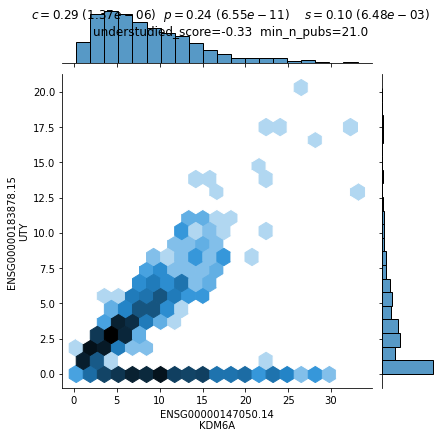

'Index: 1'

('ENSG00000115165.9', 'ENSG00000235750.9')

('CYTIP', 'KIAA0040')

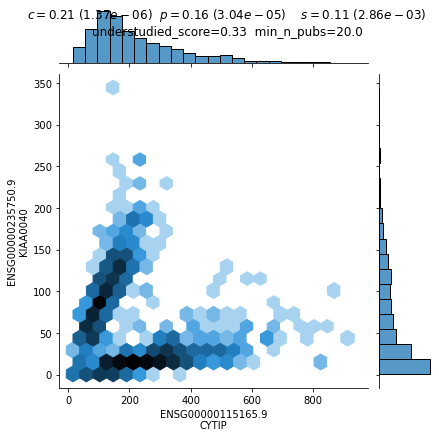

'Index: 2'

('ENSG00000115165.9', 'ENSG00000101265.15')

('CYTIP', 'RASSF2')

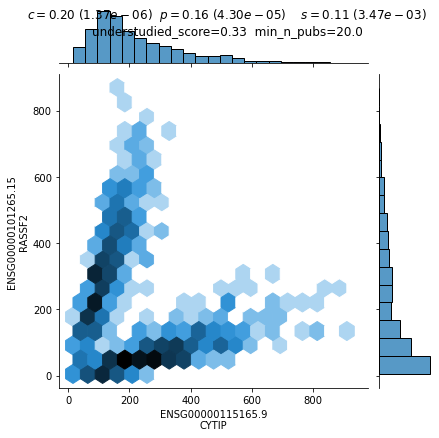

'Index: 3'

('ENSG00000198034.10', 'ENSG00000099725.14')

('RPS4X', 'PRKY')

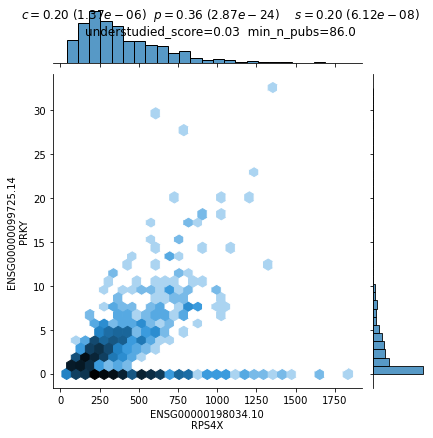

'Index: 4'

('ENSG00000147050.14', 'ENSG00000067048.16')

('KDM6A', 'DDX3Y')

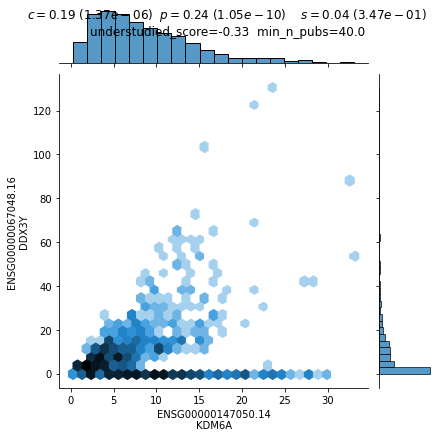

'Index: 5'

('ENSG00000137275.13', 'ENSG00000100226.15')

('RIPK1', 'GTPBP1')

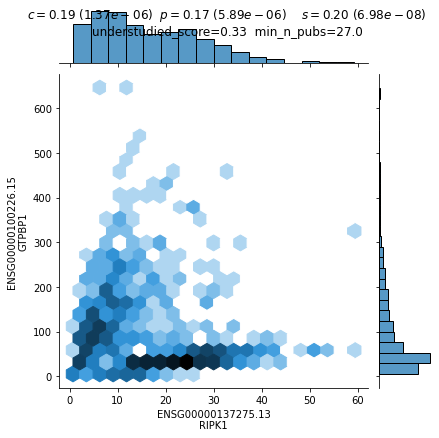

'Index: 6'

('ENSG00000064666.14', 'ENSG00000100226.15')

('CNN2', 'GTPBP1')

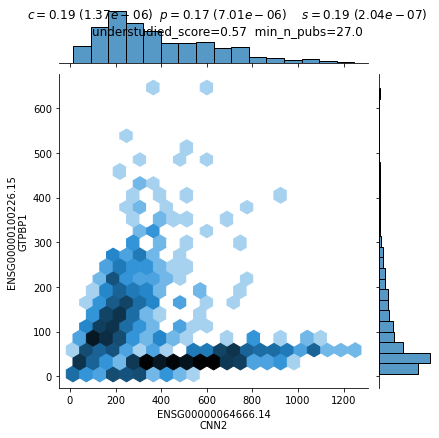

'Index: 7'

('ENSG00000107771.15', 'ENSG00000174151.14')

('CCSER2', 'CYB561D1')

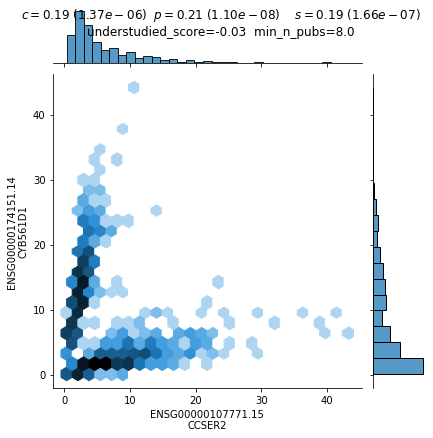

'Index: 8'

('ENSG00000196663.15', 'ENSG00000100226.15')

('TECPR2', 'GTPBP1')

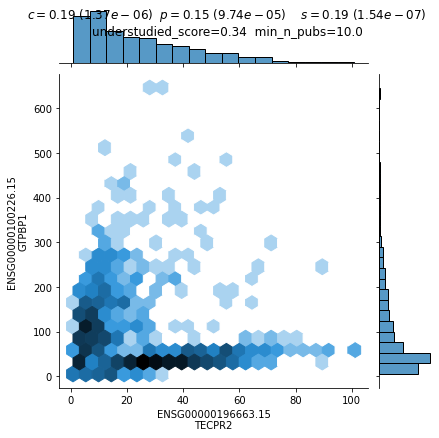

'Index: 9'

('ENSG00000167378.8', 'ENSG00000174151.14')

('IRGQ', 'CYB561D1')

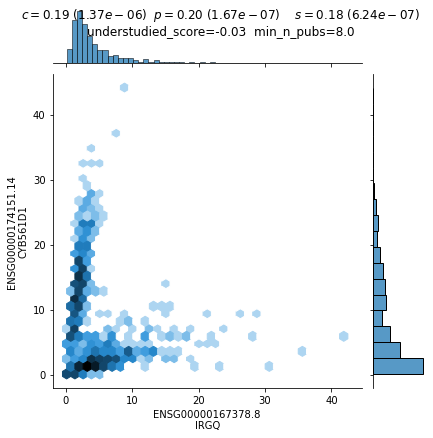

'Index: 10'

('ENSG00000115165.9', 'ENSG00000105514.7')

('CYTIP', 'RAB3D')

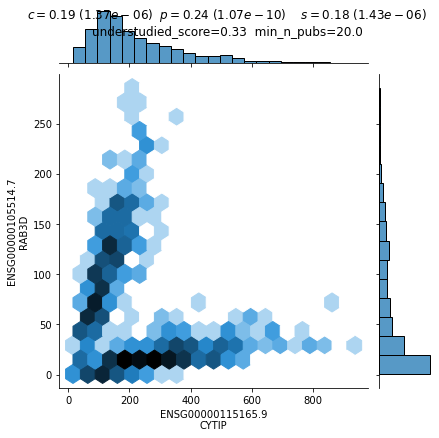

'Index: 11'

('ENSG00000255139.1', 'ENSG00000101265.15')

('AP000442.1', 'RASSF2')

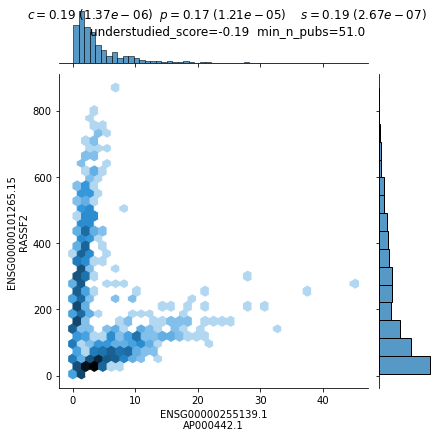

'Index: 12'

('ENSG00000115165.9', 'ENSG00000160785.13')

('CYTIP', 'SLC25A44')

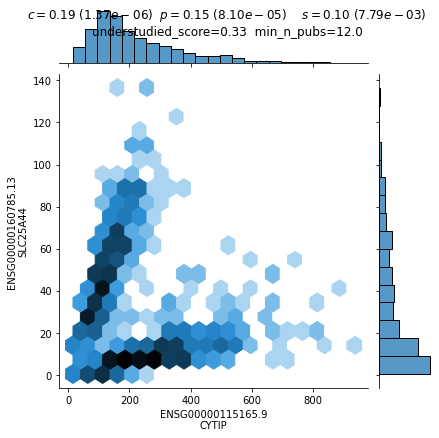

'Index: 13'

('ENSG00000115165.9', 'ENSG00000241878.11')

('CYTIP', 'PISD')

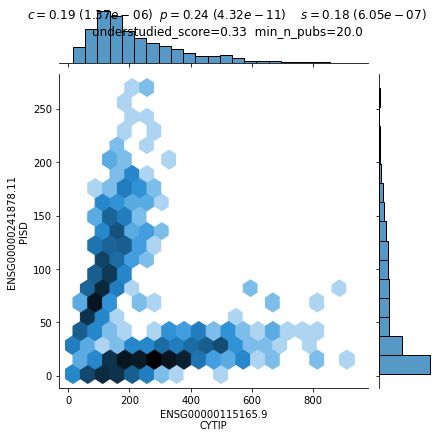

'Index: 14'

('ENSG00000140455.16', 'ENSG00000100226.15')

('USP3', 'GTPBP1')

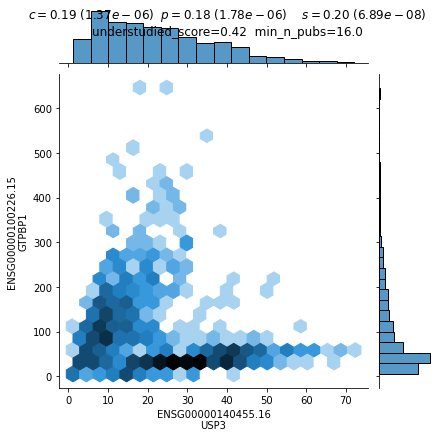

'Index: 15'

('ENSG00000142599.17', 'ENSG00000100226.15')

('RERE', 'GTPBP1')

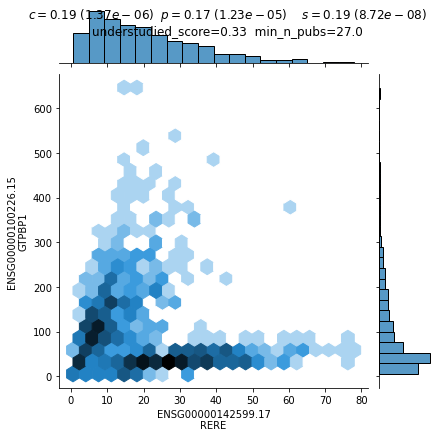

'Index: 16'

('ENSG00000171608.15', 'ENSG00000100226.15')

('PIK3CD', 'GTPBP1')

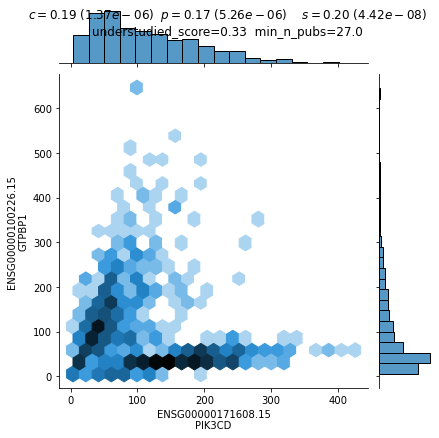

'Index: 17'

('ENSG00000107771.15', 'ENSG00000185905.3')

('CCSER2', 'C16orf54')

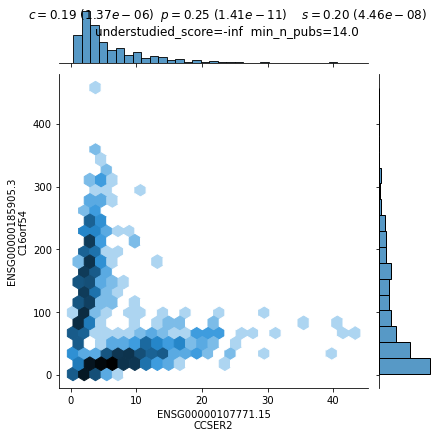

'Index: 18'

('ENSG00000115165.9', 'ENSG00000197324.8')

('CYTIP', 'LRP10')

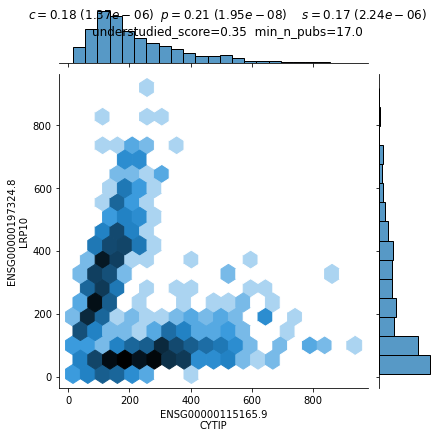

'Index: 19'

('ENSG00000129925.10', 'ENSG00000100226.15')

('TMEM8A', 'GTPBP1')

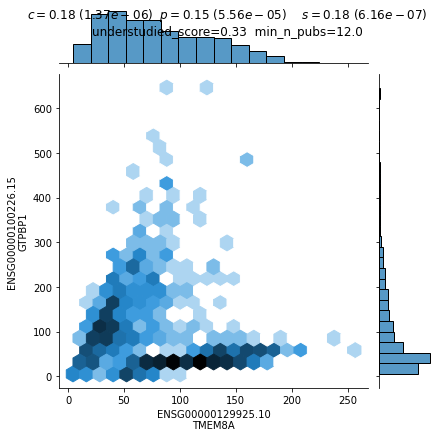

'Index: 20'

('ENSG00000059804.15', 'ENSG00000174125.7')

('SLC2A3', 'TLR1')

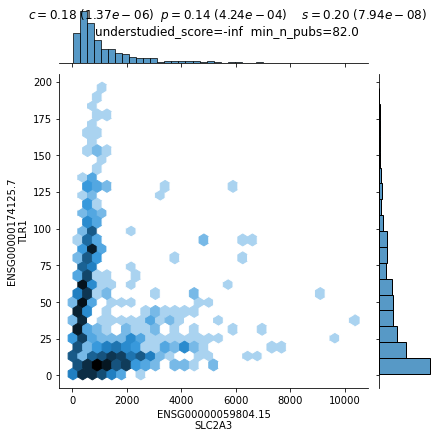

'Index: 21'

('ENSG00000167378.8', 'ENSG00000143412.9')

('IRGQ', 'ANXA9')

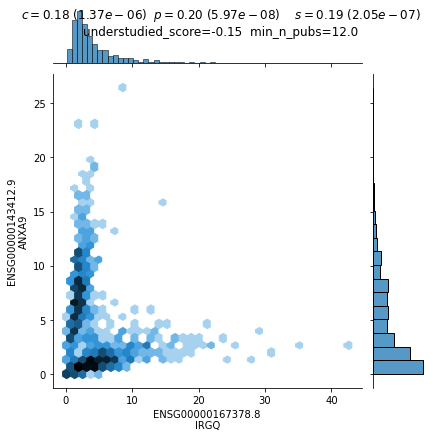

'Index: 22'

('ENSG00000110057.7', 'ENSG00000100226.15')

('UNC93B1', 'GTPBP1')

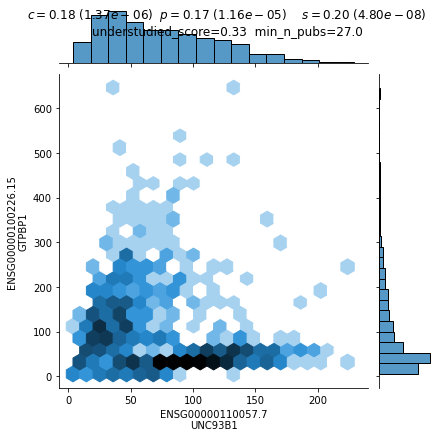

'Index: 23'

('ENSG00000198001.13', 'ENSG00000100226.15')

('IRAK4', 'GTPBP1')

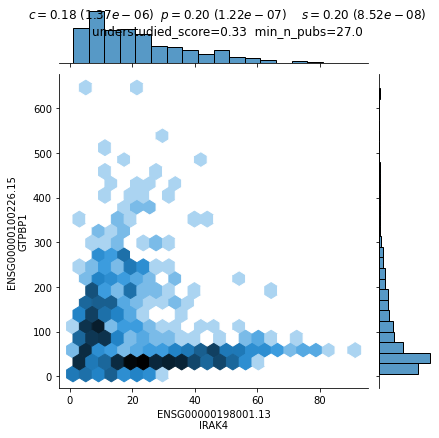

'Index: 24'

('ENSG00000205045.8', 'ENSG00000130772.13')

('SLFN12L', 'MED18')

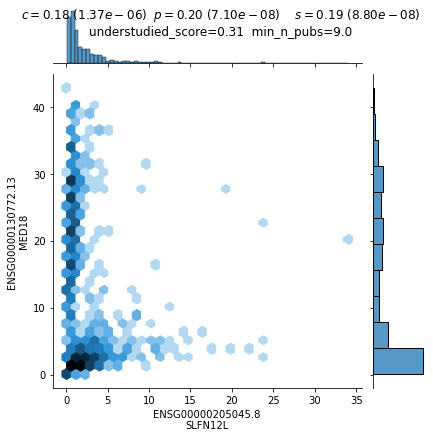

'Index: 25'

('ENSG00000005379.15', 'ENSG00000174151.14')

('TSPOAP1', 'CYB561D1')

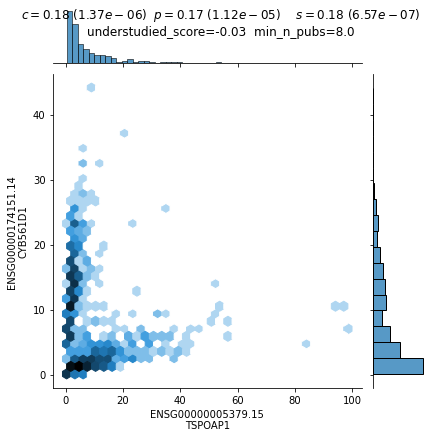

'Index: 26'

('ENSG00000168887.10', 'ENSG00000227782.2')

('C2orf68', 'CTC-529I10.2')

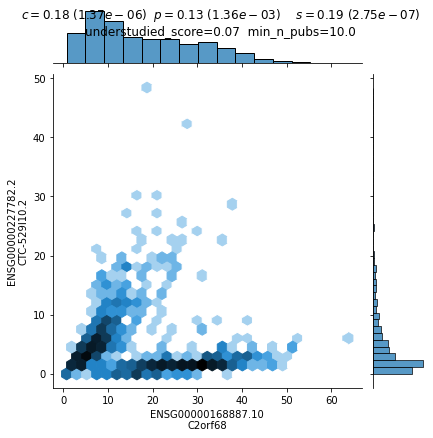

'Index: 27'

('ENSG00000107771.15', 'ENSG00000166272.16')

('CCSER2', 'WBP1L')

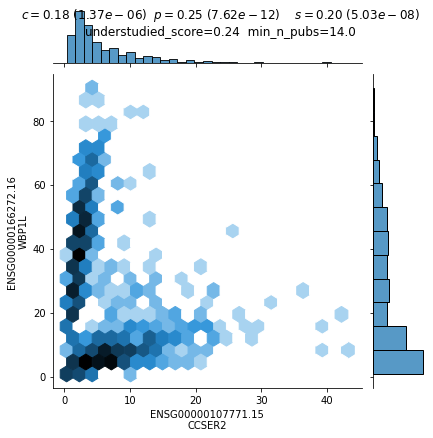

In [78]:
for i in range(min(_tmp_df.shape[0], 30)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting by top coefficient value and non-significant other p-value

In [79]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_pval = _tmp_df[
    (_tmp_df[_coef_fdr_col_name] > 0.05)
]  # .sort_values("spearman_fdr", ascending=False)
display(_tmp_df_pval)

ccc   pearson  spearman  \
ENSG00000147050.14 ENSG00000067048.16  0.193557  0.237462   0.03535   

                                       clustermatch_rank  pearson_rank  \
ENSG00000147050.14 ENSG00000067048.16          8989374.0     6225427.0   

                                       spearman_rank   ccc_fdr   pearson_fdr  \
ENSG00000147050.14 ENSG00000067048.16       716931.0  0.000001  1.045469e-10   

                                       spearman_fdr  understudied_score  \
ENSG00000147050.14 ENSG00000067048.16      0.346752           -0.326795   

                                       min_n_pubs  
ENSG00000147050.14 ENSG00000067048.16          40

'Index: 0'

('ENSG00000147050.14', 'ENSG00000067048.16')

('KDM6A', 'DDX3Y')

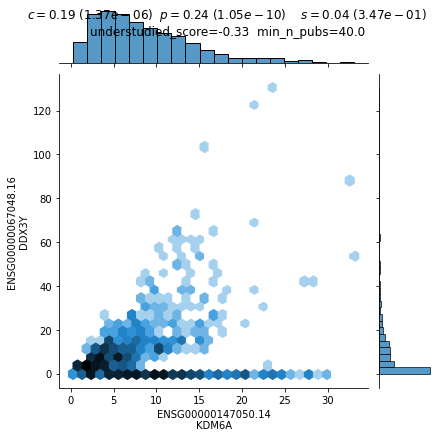

In [80]:
for i in range(min(_tmp_df_pval.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting non-significant other p-value

In [81]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_other_pval = _tmp_df[_tmp_df[_coef_fdr_col_name] > 0.05].sort_values(
    _coef_fdr_col_name, ascending=False
)
display(_tmp_df_other_pval)

ccc   pearson  spearman  \
ENSG00000147050.14 ENSG00000067048.16  0.193557  0.237462   0.03535   

                                       clustermatch_rank  pearson_rank  \
ENSG00000147050.14 ENSG00000067048.16          8989374.0     6225427.0   

                                       spearman_rank   ccc_fdr   pearson_fdr  \
ENSG00000147050.14 ENSG00000067048.16       716931.0  0.000001  1.045469e-10   

                                       spearman_fdr  understudied_score  \
ENSG00000147050.14 ENSG00000067048.16      0.346752           -0.326795   

                                       min_n_pubs  
ENSG00000147050.14 ENSG00000067048.16          40

'Index: 0'

('ENSG00000147050.14', 'ENSG00000067048.16')

('KDM6A', 'DDX3Y')

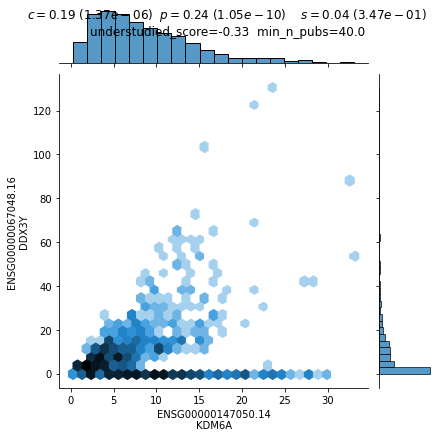

In [82]:
for i in range(min(_tmp_df_other_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_other_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [83]:
gene_pair_subset = "c_vs_rs"

#### Initial selection

Initial (first manuscript submission) gene pair selection considering coefficient values only (but not their p-value):

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_rs-KDM6A_vs_UTY.svg')

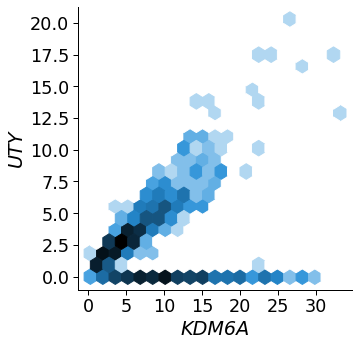

In [84]:
gene0_id = "ENSG00000147050.14"
gene1_id = "ENSG00000183878.15"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [85]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.8399999999999996,
 'pearson': 0.5099999999999998,
 'spearman': 0.15999999999999998}

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_rs-CYTIP_vs_RASSF2.svg')

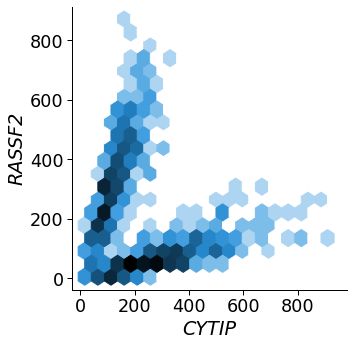

In [86]:
gene0_id = "ENSG00000115165.9"
gene1_id = "ENSG00000101265.15"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [87]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.7399999999999997,
 'pearson': 0.3799999999999999,
 'spearman': 0.16999999999999998}

#### Second selection

Second (after first revision) gene pair selection, which considers both coefficient values and p-value.

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_rs-KDM6A_vs_DDX3Y.svg')

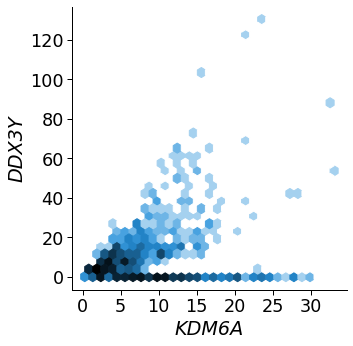

In [88]:
gene0_id = "ENSG00000147050.14"
gene1_id = "ENSG00000067048.16"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [89]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.7199999999999996, 'pearson': 0.4999999999999998, 'spearman': 0.1}

## CCC vs Spearman/Pearson

In [90]:
_coef_fdr_col_name = "spearman_fdr"

In [91]:
_tmp_df = get_gene_pairs(
    "ccc",
    {
        "Clustermatch (high)",
        "Spearman (low)",
        "Pearson (low)",
    },
)

save_gene_pairs(_tmp_df, "clustermatch_vs_pearson_spearman")

display(_tmp_df.shape)
display(_tmp_df)

(8, 11)

ccc   pearson  spearman  \
ENSG00000101152.10 ENSG00000100226.15  0.193464  0.107576  0.156998   
ENSG00000251474.6  ENSG00000229598.1   0.193464  0.073375  0.186682   
ENSG00000189114.6  ENSG00000278330.1   0.188812  0.028556  0.192653   
ENSG00000225963.7  ENSG00000229598.1   0.184279  0.070892  0.197203   
ENSG00000100055.20 ENSG00000100226.15  0.184217  0.087254  0.183848   
ENSG00000162413.16 ENSG00000235027.1   0.184217  0.062875  0.186421   
ENSG00000125319.14 ENSG00000088325.15  0.183514  0.069207  0.134905   
ENSG00000170871.11 ENSG00000229598.1   0.181940  0.067078  0.182466   

                                       clustermatch_rank  pearson_rank  \
ENSG00000101152.10 ENSG00000100226.15          8979610.0     3482451.0   
ENSG00000251474.6  ENSG00000229598.1           8979610.0     2512718.0   
ENSG00000189114.6  ENSG00000278330.1           8897293.5     1043401.0   
ENSG00000225963.7  ENSG00000229598.1           8823932.0     2437032.0   
ENSG00000100055.20 ENSG00000100226.15          8813629.5     2922303.0   
ENSG00000162413.16 ENSG00000235027.1           8813629.5     2188393.0   
ENSG00000125319.14 ENSG00000088325.15          8802636.0     2385010.0   
ENSG00000170871.11 ENSG00000229598.1           8771662.0     2319153.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000101152.10 ENSG00000100226.15      3018450.0  0.000001     0.005132   
ENSG00000251474.6  ENSG00000229598.1       3534806.0  0.000001     0.055651   
ENSG00000189114.6  ENSG00000278330.1       3636575.0  0.000001     0.463019   
ENSG00000225963.7  ENSG00000229598.1       3713281.0  0.000001     0.064512   
ENSG00000100055.20 ENSG00000100226.15      3486726.0  0.000001     0.022883   
ENSG00000162413.16 ENSG00000235027.1       3530425.0  0.000001     0.101362   
ENSG00000125319.14 ENSG00000088325.15      2621517.0  0.000001     0.071109   
ENSG00000170871.11 ENSG00000229598.1       3463190.0  0.000001     0.080355   

                                       spearman_fdr  understudied_score  \
ENSG00000101152.10 ENSG00000100226.15  1.810946e-05            0.332355   
ENSG00000251474.6  ENSG00000229598.1   3.071763e-07                -inf   
ENSG00000189114.6  ENSG00000278330.1   1.243621e-07           -0.033741   
ENSG00000225963.7  ENSG00000229598.1   6.121070e-08                -inf   
ENSG00000100055.20 ENSG00000100226.15  4.669500e-07            0.593615   
ENSG00000162413.16 ENSG00000235027.1   3.193013e-07            0.263948   
ENSG00000125319.14 ENSG00000088325.15  2.407654e-04            0.243668   
ENSG00000170871.11 ENSG00000229598.1   5.713823e-07            0.260199   

                                       min_n_pubs  
ENSG00000101152.10 ENSG00000100226.15        27.0  
ENSG00000251474.6  ENSG00000229598.1          inf  
ENSG00000189114.6  ENSG00000278330.1         14.0  
ENSG00000225963.7  ENSG00000229598.1          inf  
ENSG00000100055.20 ENSG00000100226.15        16.0  
ENSG00000162413.16 ENSG00000235027.1         11.0  
ENSG00000125319.14 ENSG00000088325.15         9.0  
ENSG00000170871.11 ENSG00000229598.1         12.0

### Preview sorting by top coefficient value only

'Index: 0'

('ENSG00000101152.10', 'ENSG00000100226.15')

('DNAJC5', 'GTPBP1')

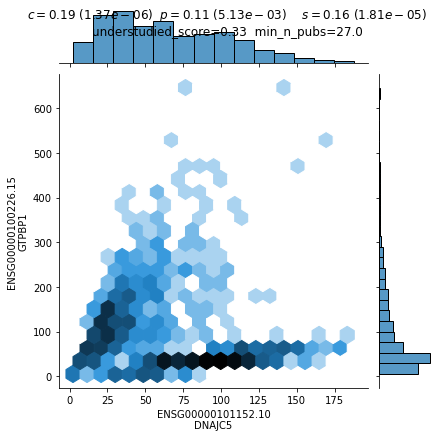

'Index: 1'

('ENSG00000251474.6', 'ENSG00000229598.1')

('RPL32P3', 'PRDX3P1')

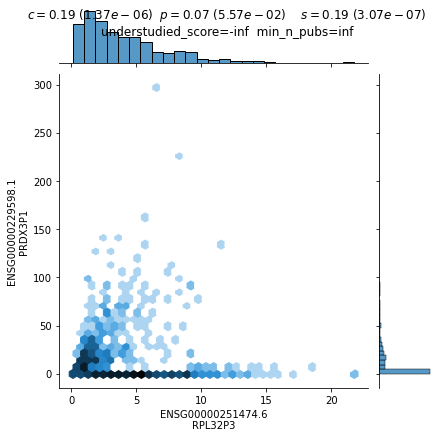

'Index: 2'

('ENSG00000189114.6', 'ENSG00000278330.1')

('BLOC1S3', 'RP11-4B16.4')

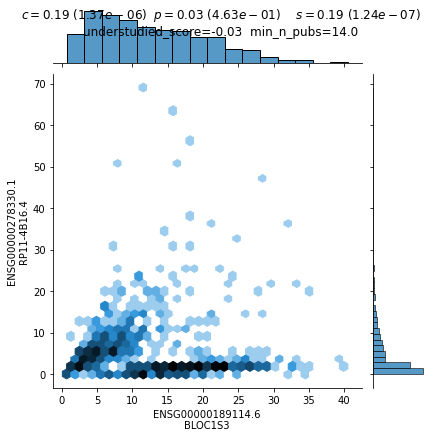

'Index: 3'

('ENSG00000225963.7', 'ENSG00000229598.1')

('AC009950.2', 'PRDX3P1')

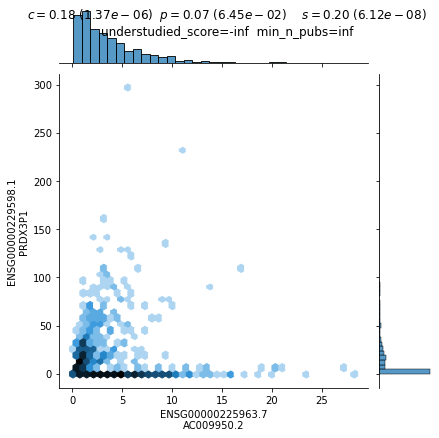

'Index: 4'

('ENSG00000100055.20', 'ENSG00000100226.15')

('CYTH4', 'GTPBP1')

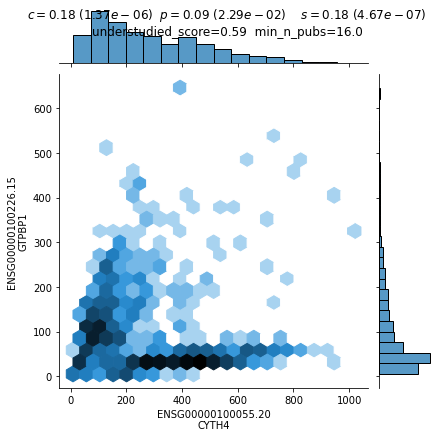

'Index: 5'

('ENSG00000162413.16', 'ENSG00000235027.1')

('KLHL21', 'AC068580.6')

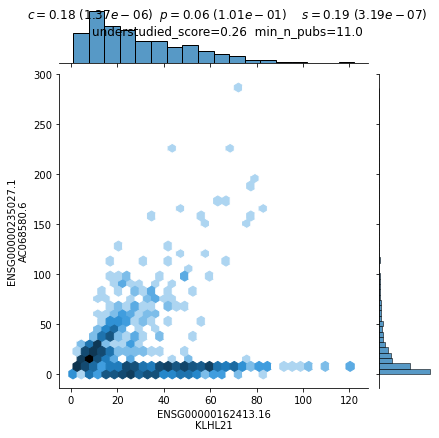

'Index: 6'

('ENSG00000125319.14', 'ENSG00000088325.15')

('C17orf53', 'TPX2')

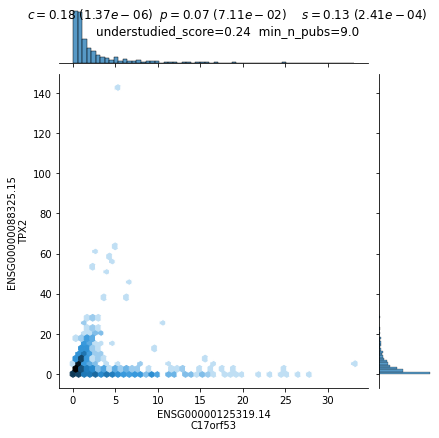

'Index: 7'

('ENSG00000170871.11', 'ENSG00000229598.1')

('KIAA0232', 'PRDX3P1')

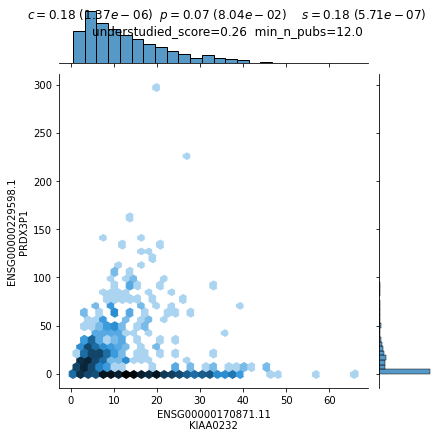

In [92]:
for i in range(min(_tmp_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting by top coefficient value and non-significant other p-value

In [93]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_pval = _tmp_df[
    (_tmp_df[_coef_fdr_col_name] > 1e-5) & (_tmp_df["pearson_fdr"] > 0.05)
]  # .sort_values("spearman_fdr", ascending=False)
display(_tmp_df_pval)

ccc   pearson  spearman  \
ENSG00000125319.14 ENSG00000088325.15  0.183514  0.069207  0.134905   

                                       clustermatch_rank  pearson_rank  \
ENSG00000125319.14 ENSG00000088325.15          8802636.0     2385010.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000125319.14 ENSG00000088325.15      2621517.0  0.000001     0.071109   

                                       spearman_fdr  understudied_score  \
ENSG00000125319.14 ENSG00000088325.15      0.000241            0.243668   

                                       min_n_pubs  
ENSG00000125319.14 ENSG00000088325.15         9.0

'Index: 0'

('ENSG00000125319.14', 'ENSG00000088325.15')

('C17orf53', 'TPX2')

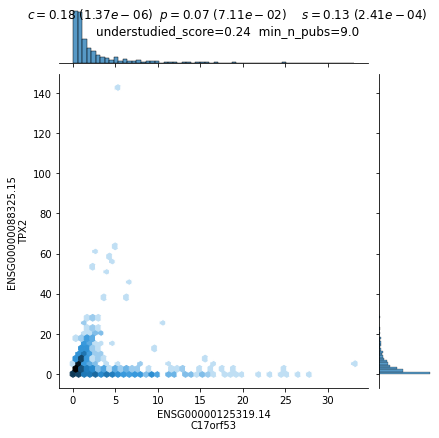

In [94]:
for i in range(min(_tmp_df_pval.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting non-significant other p-value

In [95]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_other_pval = _tmp_df[(_tmp_df["pearson_fdr"] > 0.05)].sort_values(
    _coef_fdr_col_name, ascending=False
)
display(_tmp_df_other_pval)

ccc   pearson  spearman  \
ENSG00000125319.14 ENSG00000088325.15  0.183514  0.069207  0.134905   
ENSG00000170871.11 ENSG00000229598.1   0.181940  0.067078  0.182466   
ENSG00000162413.16 ENSG00000235027.1   0.184217  0.062875  0.186421   
ENSG00000251474.6  ENSG00000229598.1   0.193464  0.073375  0.186682   
ENSG00000189114.6  ENSG00000278330.1   0.188812  0.028556  0.192653   
ENSG00000225963.7  ENSG00000229598.1   0.184279  0.070892  0.197203   

                                       clustermatch_rank  pearson_rank  \
ENSG00000125319.14 ENSG00000088325.15          8802636.0     2385010.0   
ENSG00000170871.11 ENSG00000229598.1           8771662.0     2319153.0   
ENSG00000162413.16 ENSG00000235027.1           8813629.5     2188393.0   
ENSG00000251474.6  ENSG00000229598.1           8979610.0     2512718.0   
ENSG00000189114.6  ENSG00000278330.1           8897293.5     1043401.0   
ENSG00000225963.7  ENSG00000229598.1           8823932.0     2437032.0   

                                       spearman_rank   ccc_fdr  pearson_fdr  \
ENSG00000125319.14 ENSG00000088325.15      2621517.0  0.000001     0.071109   
ENSG00000170871.11 ENSG00000229598.1       3463190.0  0.000001     0.080355   
ENSG00000162413.16 ENSG00000235027.1       3530425.0  0.000001     0.101362   
ENSG00000251474.6  ENSG00000229598.1       3534806.0  0.000001     0.055651   
ENSG00000189114.6  ENSG00000278330.1       3636575.0  0.000001     0.463019   
ENSG00000225963.7  ENSG00000229598.1       3713281.0  0.000001     0.064512   

                                       spearman_fdr  understudied_score  \
ENSG00000125319.14 ENSG00000088325.15  2.407654e-04            0.243668   
ENSG00000170871.11 ENSG00000229598.1   5.713823e-07            0.260199   
ENSG00000162413.16 ENSG00000235027.1   3.193013e-07            0.263948   
ENSG00000251474.6  ENSG00000229598.1   3.071763e-07                -inf   
ENSG00000189114.6  ENSG00000278330.1   1.243621e-07           -0.033741   
ENSG00000225963.7  ENSG00000229598.1   6.121070e-08                -inf   

                                       min_n_pubs  
ENSG00000125319.14 ENSG00000088325.15         9.0  
ENSG00000170871.11 ENSG00000229598.1         12.0  
ENSG00000162413.16 ENSG00000235027.1         11.0  
ENSG00000251474.6  ENSG00000229598.1          inf  
ENSG00000189114.6  ENSG00000278330.1         14.0  
ENSG00000225963.7  ENSG00000229598.1          inf

'Index: 0'

('ENSG00000125319.14', 'ENSG00000088325.15')

('C17orf53', 'TPX2')

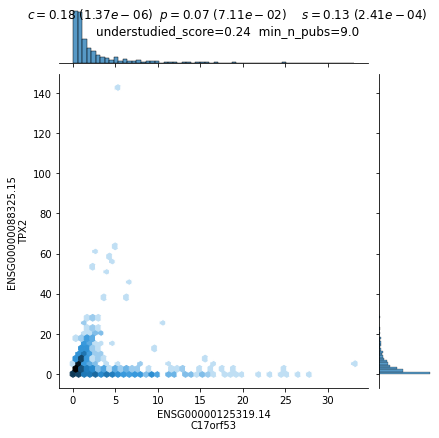

'Index: 1'

('ENSG00000170871.11', 'ENSG00000229598.1')

('KIAA0232', 'PRDX3P1')

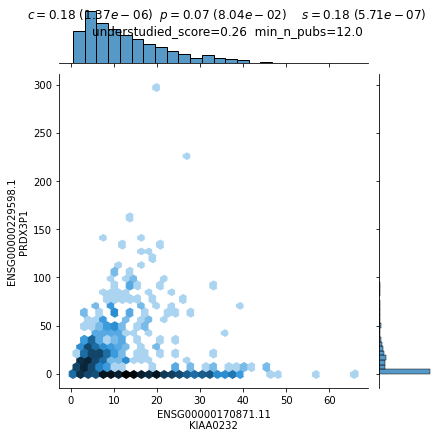

'Index: 2'

('ENSG00000162413.16', 'ENSG00000235027.1')

('KLHL21', 'AC068580.6')

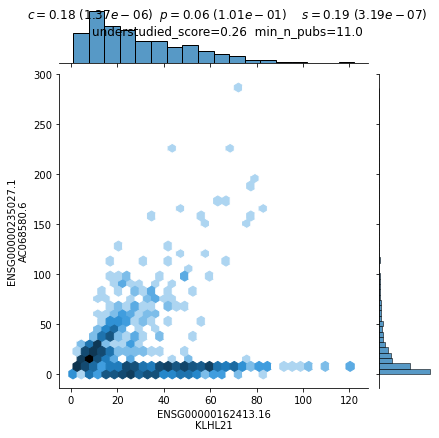

'Index: 3'

('ENSG00000251474.6', 'ENSG00000229598.1')

('RPL32P3', 'PRDX3P1')

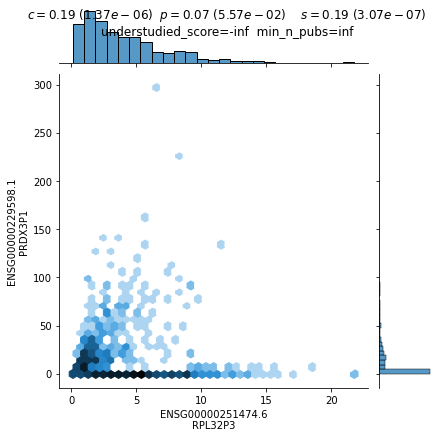

'Index: 4'

('ENSG00000189114.6', 'ENSG00000278330.1')

('BLOC1S3', 'RP11-4B16.4')

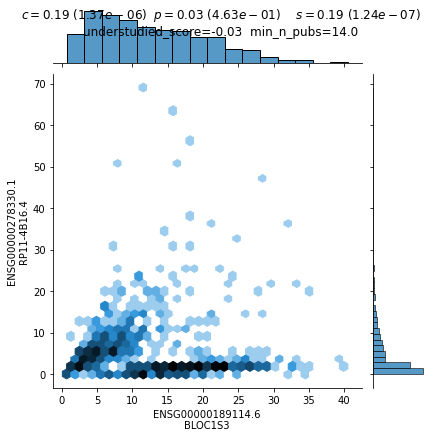

In [96]:
for i in range(min(_tmp_df_other_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_other_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [97]:
gene_pair_subset = "c_vs_r_rs"

#### Initial selection

Initial (first manuscript submission) gene pair selection considering coefficient values only (but not their p-value):

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-c_vs_r_rs-KLHL21_vs_AC068580.6.svg')

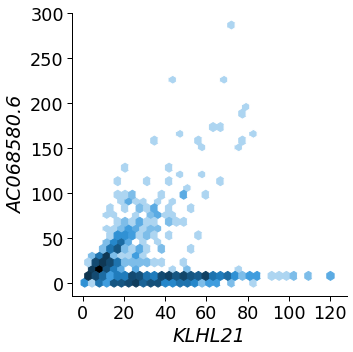

In [98]:
gene0_id = "ENSG00000162413.16"
gene1_id = "ENSG00000235027.1"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [99]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.7099999999999996,
 'pearson': 0.17999999999999997,
 'spearman': 0.2899999999999999}

#### Second selection

Second (after first revision) gene pair selection, which considers both coefficient values and p-value.

In [100]:
# gene0_id = "xxx"
# gene1_id = "yyy"

# plot_and_save_gene_pair(
#     gene_expr_df.T,
#     gene0_id,
#     gene1_id,
#     output_file_subset=gene_pair_subset,
# )

In [101]:
# # get percentiles
# _tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
# display(get_percentiles(_tmp))

## Pearson vs CCC

In [102]:
_coef_fdr_col_name = "ccc_fdr"

In [103]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Clustermatch (low)",
        "Pearson (high)",
    },
)

save_gene_pairs(_tmp_df, "pearson_vs_clustermatch")

display(_tmp_df.shape)
display(_tmp_df)

(1075, 11)

ccc   pearson  spearman  \
ENSG00000130598.15 ENSG00000177791.11  0.034593  0.967834  0.284206   
ENSG00000086967.9  ENSG00000130598.15  0.034593  0.965012  0.314172   
ENSG00000177791.11 ENSG00000068976.13  0.032751  0.964681  0.248365   
ENSG00000086967.9  ENSG00000068976.13  0.032234  0.957893  0.234647   
ENSG00000180209.11 ENSG00000068976.13  0.027118  0.955315  0.248569   
...                                         ...       ...       ...   
ENSG00000275092.1  ENSG00000181800.5   0.020965  0.434911  0.232979   
ENSG00000126368.5  ENSG00000092054.12  0.016958  0.434879  0.200617   
ENSG00000081154.11 ENSG00000184205.14  0.033997  0.434810  0.317686   
ENSG00000131013.3  ENSG00000255717.6   0.033879  0.434786  0.335524   
ENSG00000182568.16 ENSG00000196436.8   0.033995  0.434711  0.239586   

                                       clustermatch_rank  pearson_rank  \
ENSG00000130598.15 ENSG00000177791.11          3714425.5    12497377.0   
ENSG00000086967.9  ENSG00000130598.15          3714425.5    12497343.0   
ENSG00000177791.11 ENSG00000068976.13          3556384.0    12497334.0   
ENSG00000086967.9  ENSG00000068976.13          3499276.0    12497205.0   
ENSG00000180209.11 ENSG00000068976.13          2995235.0    12497111.0   
...                                                  ...           ...   
ENSG00000275092.1  ENSG00000181800.5           2274241.5     8750317.0   
ENSG00000126368.5  ENSG00000092054.12          1767851.5     8749987.0   
ENSG00000081154.11 ENSG00000184205.14          3665108.0     8749230.0   
ENSG00000131013.3  ENSG00000255717.6           3656275.0     8749003.0   
ENSG00000182568.16 ENSG00000196436.8           3665007.0     8748251.0   

                                       spearman_rank   ccc_fdr   pearson_fdr  \
ENSG00000130598.15 ENSG00000177791.11      5069769.0  0.000001  0.000000e+00   
ENSG00000086967.9  ENSG00000130598.15      5504793.0  0.000001  0.000000e+00   
ENSG00000177791.11 ENSG00000068976.13      4532919.0  0.000005  0.000000e+00   
ENSG00000086967.9  ENSG00000068976.13      4320035.0  0.000003  0.000000e+00   
ENSG00000180209.11 ENSG00000068976.13      4536023.0  0.000004  0.000000e+00   
...                                              ...       ...           ...   
ENSG00000275092.1  ENSG00000181800.5       4293800.0       NaN           NaN   
ENSG00000126368.5  ENSG00000092054.12      3770183.0       NaN           NaN   
ENSG00000081154.11 ENSG00000184205.14      5555090.0  0.000001  1.033156e-35   
ENSG00000131013.3  ENSG00000255717.6       5806190.0  0.000004  1.042919e-35   
ENSG00000182568.16 ENSG00000196436.8       4397091.0  0.000001  1.074674e-35   

                                       spearman_fdr  understudied_score  \
ENSG00000130598.15 ENSG00000177791.11  2.583831e-15           -0.107437   
ENSG00000086967.9  ENSG00000130598.15  1.486414e-18            0.185269   
ENSG00000177791.11 ENSG00000068976.13  6.505173e-12           -0.107437   
ENSG00000086967.9  ENSG00000068976.13  9.601925e-11            0.185269   
ENSG00000180209.11 ENSG00000068976.13  6.243948e-12            0.544017   
...                                             ...                 ...   
ENSG00000275092.1  ENSG00000181800.5            NaN                -inf   
ENSG00000126368.5  ENSG00000092054.12           NaN           -0.308392   
ENSG00000081154.11 ENSG00000184205.14  5.849689e-19           -0.067384   
ENSG00000131013.3  ENSG00000255717.6   4.205029e-21            0.169667   
ENSG00000182568.16 ENSG00000196436.8   3.713724e-11           -0.382425   

                                       min_n_pubs  
ENSG00000130598.15 ENSG00000177791.11        21.0  
ENSG00000086967.9  ENSG00000130598.15        16.0  
ENSG00000177791.11 ENSG00000068976.13        21.0  
ENSG00000086967.9  ENSG00000068976.13        16.0  
ENSG00000180209.11 ENSG00000068976.13        12.0  
...                                           ...  
ENSG00000275092.1  ENSG00000181800.5          inf  
ENSG00000126368.5  ENSG0

### Preview sorting by top coefficient value only

'Index: 0'

('ENSG00000130598.15', 'ENSG00000177791.11')

('TNNI2', 'MYOZ1')

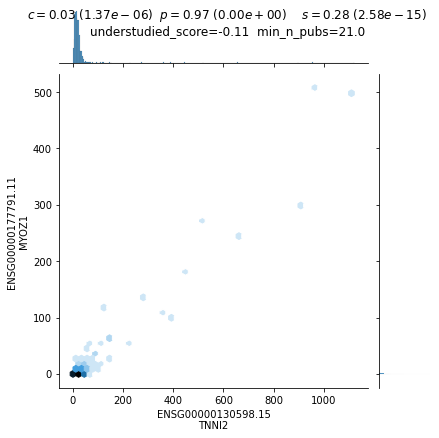

'Index: 1'

('ENSG00000086967.9', 'ENSG00000130598.15')

('MYBPC2', 'TNNI2')

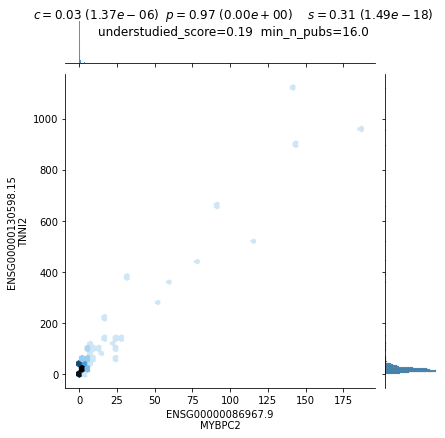

'Index: 2'

('ENSG00000177791.11', 'ENSG00000068976.13')

('MYOZ1', 'PYGM')

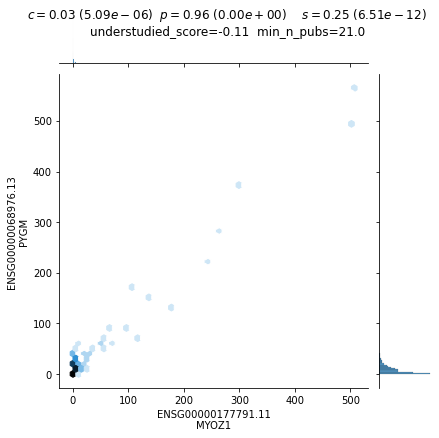

'Index: 3'

('ENSG00000086967.9', 'ENSG00000068976.13')

('MYBPC2', 'PYGM')

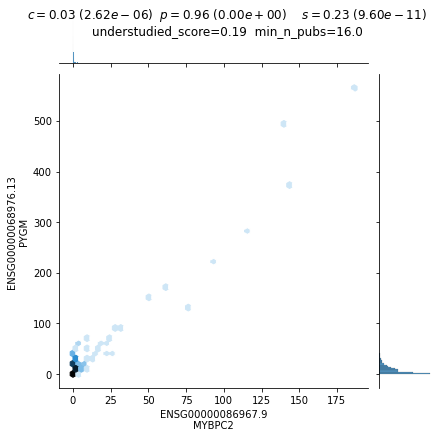

'Index: 4'

('ENSG00000180209.11', 'ENSG00000068976.13')

('MYLPF', 'PYGM')

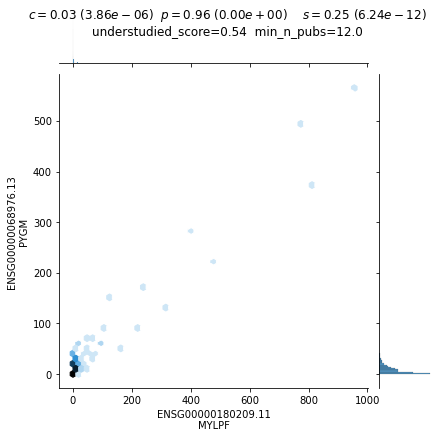

'Index: 5'

('ENSG00000130598.15', 'ENSG00000104879.4')

('TNNI2', 'CKM')

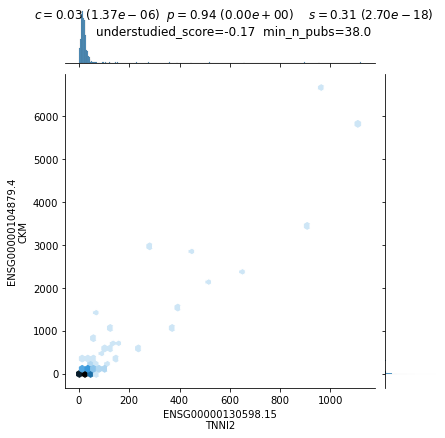

'Index: 6'

('ENSG00000130598.15', 'ENSG00000143632.14')

('TNNI2', 'ACTA1')

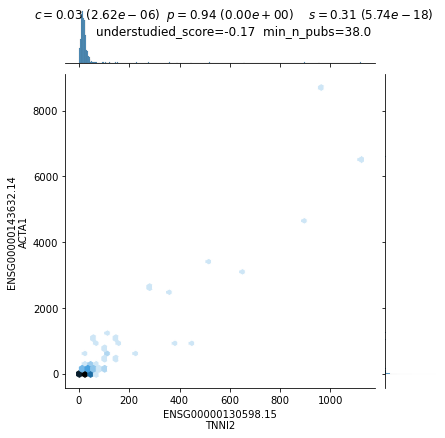

'Index: 7'

('ENSG00000161281.10', 'ENSG00000130598.15')

('COX7A1', 'TNNI2')

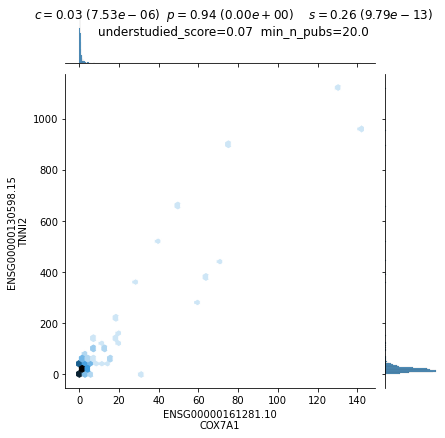

'Index: 8'

('ENSG00000125414.18', 'ENSG00000068976.13')

('MYH2', 'PYGM')

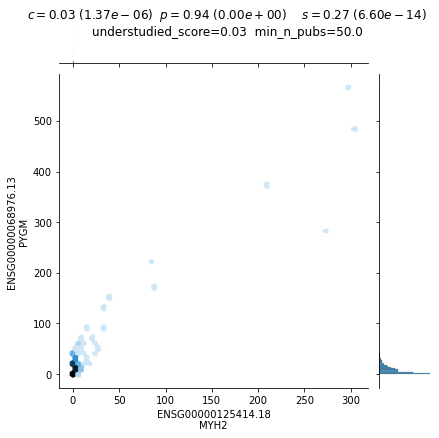

'Index: 9'

('ENSG00000068976.13', 'ENSG00000111245.14')

('PYGM', 'MYL2')

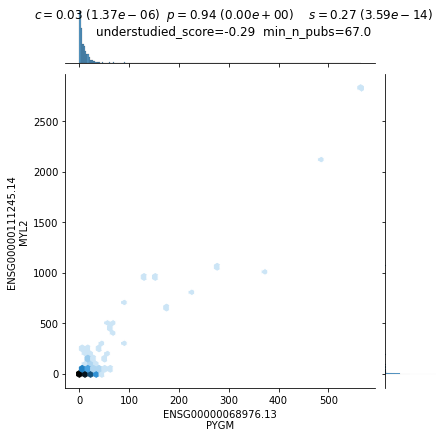

In [104]:
for i in range(min(_tmp_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting by top coefficient value and non-significant other p-value

In [105]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_pval = _tmp_df[
    (_tmp_df[_coef_fdr_col_name] > 0.001)
]  # .sort_values("spearman_fdr", ascending=False)
display(_tmp_df_pval)

ccc   pearson  spearman  \
ENSG00000086967.9 ENSG00000185482.7   0.013219  0.773951  0.219206   
ENSG00000185482.7 ENSG00000180209.11  0.013443  0.731125  0.221139   

                                      clustermatch_rank  pearson_rank  \
ENSG00000086967.9 ENSG00000185482.7           1268069.0    11967853.0   
ENSG00000185482.7 ENSG00000180209.11          1299979.0    11650044.0   

                                      spearman_rank   ccc_fdr    pearson_fdr  \
ENSG00000086967.9 ENSG00000185482.7       4074647.0  0.001679  1.078632e-150   
ENSG00000185482.7 ENSG00000180209.11      4105691.0  0.001359  2.422642e-126   

                                      spearman_fdr  understudied_score  \
ENSG00000086967.9 ENSG00000185482.7   1.636112e-09            0.403999   
ENSG00000185482.7 ENSG00000180209.11  1.159884e-09            0.544017   

                                      min_n_pubs  
ENSG00000086967.9 ENSG00000185482.7         13.0  
ENSG00000185482.7 ENSG00000180209.11        12.0

'Index: 0'

('ENSG00000086967.9', 'ENSG00000185482.7')

('MYBPC2', 'STAC3')

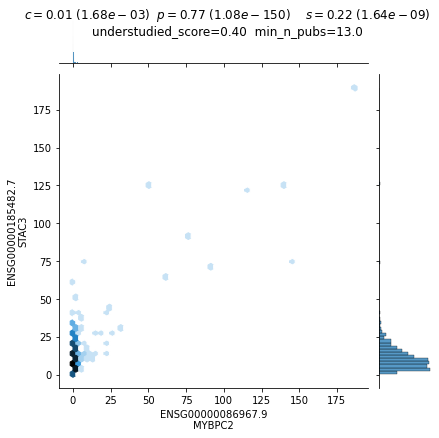

'Index: 1'

('ENSG00000185482.7', 'ENSG00000180209.11')

('STAC3', 'MYLPF')

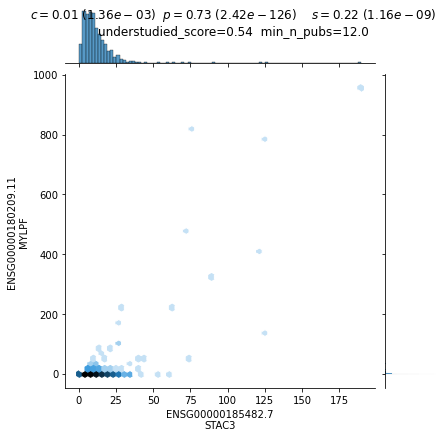

In [106]:
for i in range(min(_tmp_df_pval.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting non-significant other p-value

In [107]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_other_pval = _tmp_df[(_tmp_df[_coef_fdr_col_name] > 0.001)].sort_values(
    _coef_fdr_col_name, ascending=False
)
display(_tmp_df_other_pval)

ccc   pearson  spearman  \
ENSG00000086967.9 ENSG00000185482.7   0.013219  0.773951  0.219206   
ENSG00000185482.7 ENSG00000180209.11  0.013443  0.731125  0.221139   

                                      clustermatch_rank  pearson_rank  \
ENSG00000086967.9 ENSG00000185482.7           1268069.0    11967853.0   
ENSG00000185482.7 ENSG00000180209.11          1299979.0    11650044.0   

                                      spearman_rank   ccc_fdr    pearson_fdr  \
ENSG00000086967.9 ENSG00000185482.7       4074647.0  0.001679  1.078632e-150   
ENSG00000185482.7 ENSG00000180209.11      4105691.0  0.001359  2.422642e-126   

                                      spearman_fdr  understudied_score  \
ENSG00000086967.9 ENSG00000185482.7   1.636112e-09            0.403999   
ENSG00000185482.7 ENSG00000180209.11  1.159884e-09            0.544017   

                                      min_n_pubs  
ENSG00000086967.9 ENSG00000185482.7         13.0  
ENSG00000185482.7 ENSG00000180209.11        12.0

'Index: 0'

('ENSG00000086967.9', 'ENSG00000185482.7')

('MYBPC2', 'STAC3')

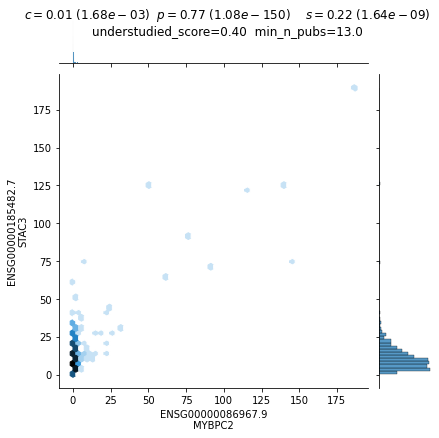

'Index: 1'

('ENSG00000185482.7', 'ENSG00000180209.11')

('STAC3', 'MYLPF')

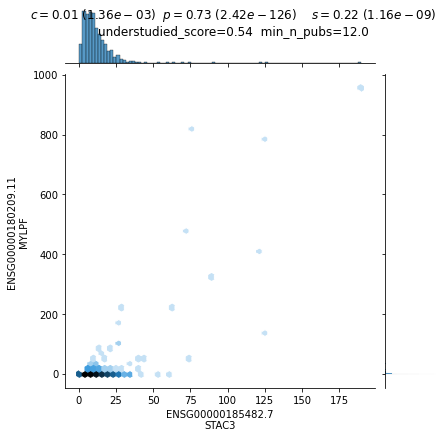

In [108]:
for i in range(min(_tmp_df_other_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_other_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [109]:
gene_pair_subset = "r_vs_c"

#### Initial selection

Initial (first manuscript submission) gene pair selection considering coefficient values only (but not their p-value):

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-r_vs_c-TNNI2_vs_MYOZ1.svg')

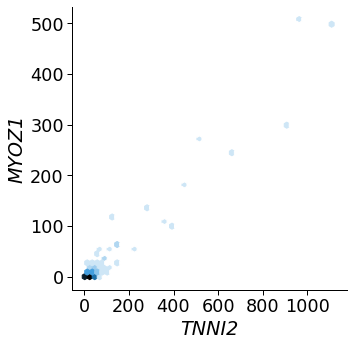

In [110]:
gene0_id = "ENSG00000130598.15"
gene1_id = "ENSG00000177791.11"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [111]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.29999999999999993,
 'pearson': 0.9999999999999996,
 'spearman': 0.4099999999999998}

#### Second selection

Second (after first revision) gene pair selection, which considers both coefficient values and p-value.

In [112]:
# gene0_id = "xxx"
# gene1_id = "yyy"

# plot_and_save_gene_pair(
#     gene_expr_df.T,
#     gene0_id,
#     gene1_id,
#     output_file_subset=gene_pair_subset,
# )

In [113]:
# # get percentiles
# _tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
# display(get_percentiles(_tmp))

## Pearson vs Spearman

Listing gene pairs, but not interested in this combination.

In [114]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Spearman (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(87, 11)

ccc   pearson  spearman  \
ENSG00000136235.15 ENSG00000133800.8   0.038197  0.923450  0.196694   
ENSG00000214274.9  ENSG00000110245.11  0.041971  0.783504  0.180828   
                   ENSG00000145321.12  0.039793  0.768642  0.154682   
                   ENSG00000130208.9   0.056221  0.732534  0.195886   
ENSG00000145192.12 ENSG00000214274.9   0.041971  0.716884  0.163153   
...                                         ...       ...       ...   
ENSG00000143772.9  ENSG00000090104.11  0.061686  0.437508  0.197910   
ENSG00000198178.10 ENSG00000281162.2   0.097293  0.436917  0.175440   
ENSG00000109606.12 ENSG00000269919.1   0.035931  0.436786  0.196683   
ENSG00000132424.14 ENSG00000090104.11  0.064704  0.436067  0.179254   
ENSG00000117091.9  ENSG00000110848.8   0.045345  0.435425  0.174842   

                                       clustermatch_rank  pearson_rank  \
ENSG00000136235.15 ENSG00000133800.8           4016168.5    12490926.0   
ENSG00000214274.9  ENSG00000110245.11          4303437.5    12030439.0   
                   ENSG00000145321.12          4141919.5    11931768.0   
                   ENSG00000130208.9           5185596.0    11661368.0   
ENSG00000145192.12 ENSG00000214274.9           4303437.5    11532036.0   
...                                                  ...           ...   
ENSG00000143772.9  ENSG00000090104.11          5468551.0     8777681.0   
ENSG00000198178.10 ENSG00000281162.2           6777340.0     8771485.0   
ENSG00000109606.12 ENSG00000269919.1           3835012.0     8770053.0   
ENSG00000132424.14 ENSG00000090104.11          5600878.0     8762484.0   
ENSG00000117091.9  ENSG00000110848.8           4552485.5     8755790.0   

                                       spearman_rank  ccc_fdr  pearson_fdr  \
ENSG00000136235.15 ENSG00000133800.8       3704595.0      NaN          NaN   
ENSG00000214274.9  ENSG00000110245.11      3434813.0      NaN          NaN   
                   ENSG00000145321.12      2977733.0      NaN          NaN   
                   ENSG00000130208.9       3690995.0      NaN          NaN   
ENSG00000145192.12 ENSG00000214274.9       3127566.0      NaN          NaN   
...                                              ...      ...          ...   
ENSG00000143772.9  ENSG00000090104.11      3724918.0      NaN          NaN   
ENSG00000198178.10 ENSG00000281162.2       3341987.0      NaN          NaN   
ENSG00000109606.12 ENSG00000269919.1       3704391.0      NaN          NaN   
ENSG00000132424.14 ENSG00000090104.11      3407798.0      NaN          NaN   
ENSG00000117091.9  ENSG00000110848.8       3331485.0      NaN          NaN   

                                       spearman_fdr  understudied_score  \
ENSG00000136235.15 ENSG00000133800.8            NaN            0.311428   
ENSG00000214274.9  ENSG00000110245.11           NaN           -0.253707   
                   ENSG00000145321.12           NaN           -0.150545   
                   ENSG00000130208.9            NaN           -0.300817   
ENSG00000145192.12 ENSG00000214274.9            NaN           -0.300817   
...                                             ...                 ...   
ENSG00000143772.9  ENSG00000090104.11           NaN            0.148379   
ENSG00000198178.10 ENSG00000281162.2            NaN           -0.141969   
ENSG00000109606.12 ENSG00000269919.1            NaN            0.300525   
ENSG00000132424.14 ENSG00000090104.11           NaN            0.382605   
ENSG00000117091.9  ENSG00000110848.8            NaN            0.042234   

                                       min_n_pubs  
ENSG00000136235.15 ENSG00000133800.8         49.0  
ENSG00000214274.9  ENSG00000110245.11       170.0  
                   ENSG00000145321.12       170.0  
                   ENSG00000130208.9        170.0  
ENSG00000145192.12 ENSG00000214274.9        170.0  
...                                           ...  
ENSG00000143772.9  ENSG00000090104.11        26.0  
ENSG00000198178.10 ENSG00000281162.2         23.

### Preview

'Index: 0'

('ENSG00000136235.15', 'ENSG00000133800.8')

('GPNMB', 'LYVE1')

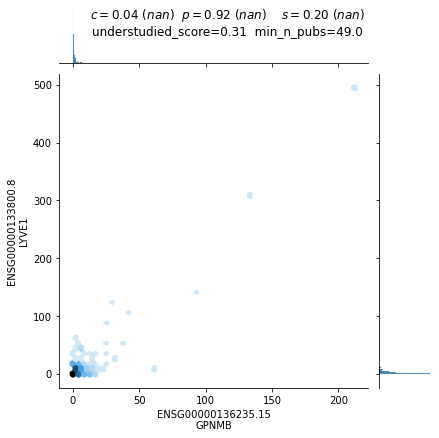

'Index: 1'

('ENSG00000214274.9', 'ENSG00000110245.11')

('ANG', 'APOC3')

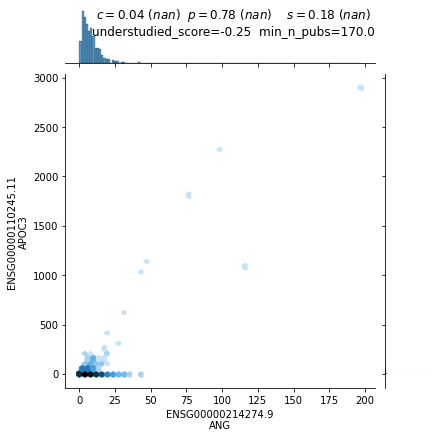

'Index: 2'

('ENSG00000214274.9', 'ENSG00000145321.12')

('ANG', 'GC')

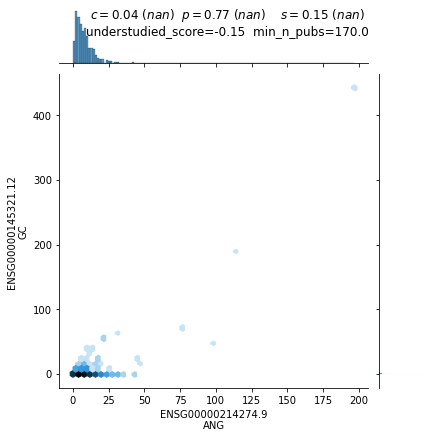

'Index: 3'

('ENSG00000214274.9', 'ENSG00000130208.9')

('ANG', 'APOC1')

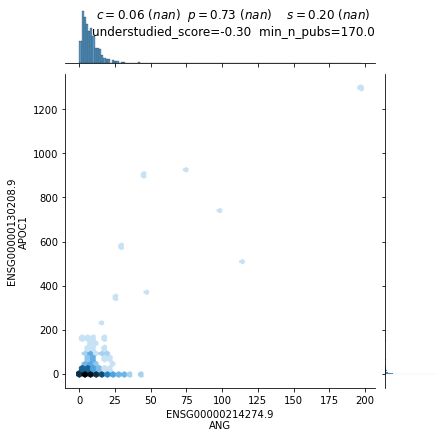

'Index: 4'

('ENSG00000145192.12', 'ENSG00000214274.9')

('AHSG', 'ANG')

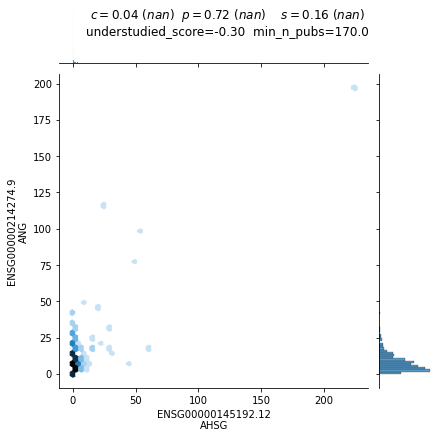

In [115]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

## Pearson vs Spearman/CCC

In [116]:
_coef_fdr_col_name = "ccc_fdr"

In [117]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Clustermatch (low)",
        "Spearman (low)",
        "Pearson (high)",
    },
)

save_gene_pairs(_tmp_df, "pearson_vs_clustermatch_spearman")

display(_tmp_df.shape)
display(_tmp_df)

(531, 11)

ccc   pearson  spearman  \
ENSG00000115009.11 ENSG00000161055.3   0.031833  0.988292  0.187233   
ENSG00000163739.4  ENSG00000161055.3   0.007038  0.975534  0.078267   
ENSG00000130598.15 ENSG00000198467.13  0.026588  0.948215  0.193457   
ENSG00000198467.13 ENSG00000068976.13  0.034912  0.944430  0.029852   
ENSG00000171345.13 ENSG00000163739.4   0.008663  0.939751  0.097291   
...                                         ...       ...       ...   
ENSG00000162654.8  ENSG00000120217.13  0.025464  0.435255  0.004066   
ENSG00000155368.16 ENSG00000166741.7   0.007392  0.435169  0.027366   
ENSG00000198892.6  ENSG00000198125.12  0.006197  0.435107  0.116825   
ENSG00000213639.9  ENSG00000121742.16  0.017215  0.435048  0.172672   
ENSG00000106992.17 ENSG00000101470.9   0.014976  0.434914  0.062000   

                                       clustermatch_rank  pearson_rank  \
ENSG00000115009.11 ENSG00000161055.3           3471638.5    12497493.0   
ENSG00000163739.4  ENSG00000161055.3            457775.5    12497441.0   
ENSG00000130598.15 ENSG00000198467.13          2930710.0    12496755.0   
ENSG00000198467.13 ENSG00000068976.13          3745874.0    12496416.0   
ENSG00000171345.13 ENSG00000163739.4            664617.0    12495782.0   
...                                                  ...           ...   
ENSG00000162654.8  ENSG00000120217.13          2812089.5     8753940.0   
ENSG00000155368.16 ENSG00000166741.7            498828.5     8753081.0   
ENSG00000198892.6  ENSG00000198125.12           354719.5     8752396.0   
ENSG00000213639.9  ENSG00000121742.16          1797227.5     8751751.0   
ENSG00000106992.17 ENSG00000101470.9           1503693.5     8750346.0   

                                       spearman_rank   ccc_fdr   pearson_fdr  \
ENSG00000115009.11 ENSG00000161055.3       3544359.0  0.000004  0.000000e+00   
ENSG00000163739.4  ENSG00000161055.3       1561424.0  0.057541  0.000000e+00   
ENSG00000130598.15 ENSG00000198467.13      3650290.0  0.000008  0.000000e+00   
ENSG00000198467.13 ENSG00000068976.13       605603.0  0.000001  0.000000e+00   
ENSG00000171345.13 ENSG00000163739.4       1924833.0  0.019337  0.000000e+00   
...                                              ...       ...           ...   
ENSG00000162654.8  ENSG00000120217.13        82556.0  0.000009  8.654072e-36   
ENSG00000155368.16 ENSG00000166741.7        555378.0  0.046595  8.951256e-36   
ENSG00000198892.6  ENSG00000198125.12      2290143.0  0.104403  9.170345e-36   
ENSG00000213639.9  ENSG00000121742.16      3293830.0  0.000280  9.390670e-36   
ENSG00000106992.17 ENSG00000101470.9       1245093.0  0.000726  9.907201e-36   

                                       spearman_fdr  understudied_score  \
ENSG00000115009.11 ENSG00000161055.3   2.829948e-07           -0.268826   
ENSG00000163739.4  ENSG00000161055.3   3.490012e-02           -0.268826   
ENSG00000130598.15 ENSG00000198467.13  1.098464e-07            0.134047   
ENSG00000198467.13 ENSG00000068976.13  4.276798e-01            0.134047   
ENSG00000171345.13 ENSG00000163739.4   8.512263e-03           -0.142761   
...                                             ...                 ...   
ENSG00000162654.8  ENSG00000120217.13  9.154728e-01            0.502069   
ENSG00000155368.16 ENSG00000166741.7   4.675090e-01                -inf   
ENSG00000198892.6  ENSG00000198125.12  1.523685e-03            0.482445   
ENSG00000213639.9  ENSG00000121742.16  2.289506e-06           -0.150814   
ENSG00000106992.17 ENSG00000101470.9   9.590533e-02            0.194948   

                                       min_n_pubs  
ENSG00000115009.11 ENSG00000161055.3         41.0  
ENSG00000163739.4  ENSG00000161055.3         41.0  
ENSG00000130598.15 ENSG00000198467.13        38.0  
ENSG00000198467.13 ENSG00000068976.13        69.0  
ENSG00000171345.13 ENSG00000163739.4        187.0  
...                                           ...  
ENSG00000162654.8  ENSG00000120217.13         8.0  
ENSG00000155368.16 ENSG0

### Preview sorting by top coefficient value only

'Index: 0'

('ENSG00000115009.11', 'ENSG00000161055.3')

('CCL20', 'SCGB3A1')

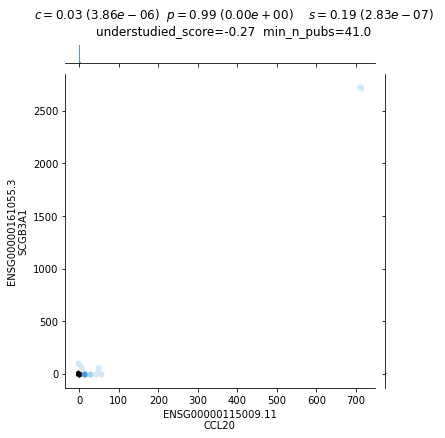

'Index: 1'

('ENSG00000163739.4', 'ENSG00000161055.3')

('CXCL1', 'SCGB3A1')

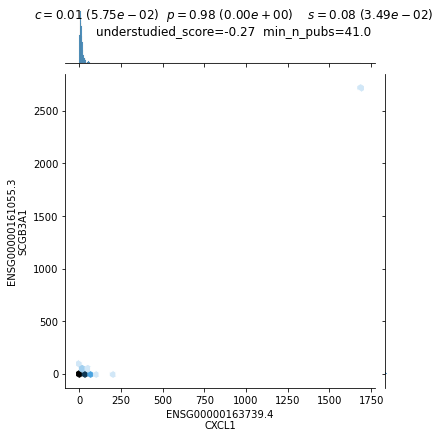

'Index: 2'

('ENSG00000130598.15', 'ENSG00000198467.13')

('TNNI2', 'TPM2')

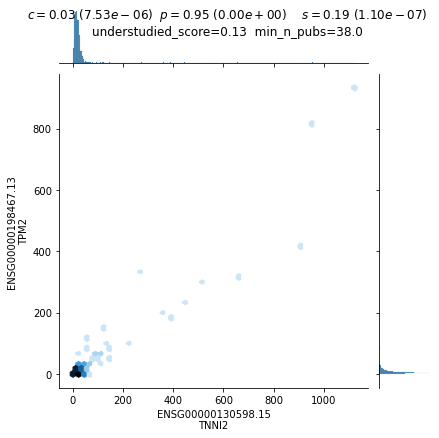

'Index: 3'

('ENSG00000198467.13', 'ENSG00000068976.13')

('TPM2', 'PYGM')

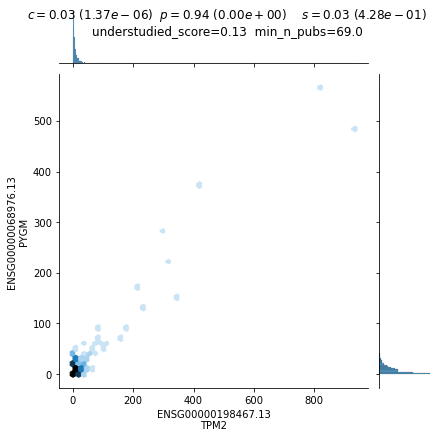

'Index: 4'

('ENSG00000171345.13', 'ENSG00000163739.4')

('KRT19', 'CXCL1')

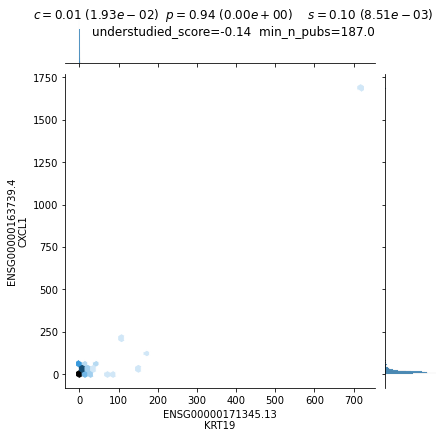

'Index: 5'

('ENSG00000108515.17', 'ENSG00000068976.13')

('ENO3', 'PYGM')

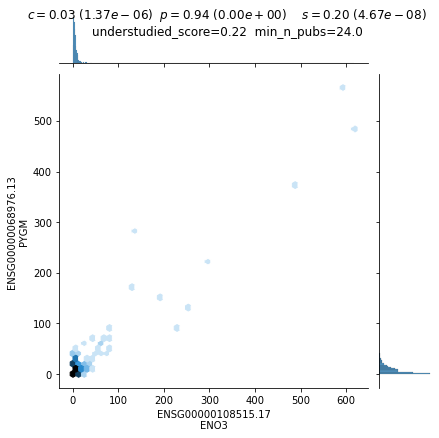

'Index: 6'

('ENSG00000184292.6', 'ENSG00000161055.3')

('TACSTD2', 'SCGB3A1')

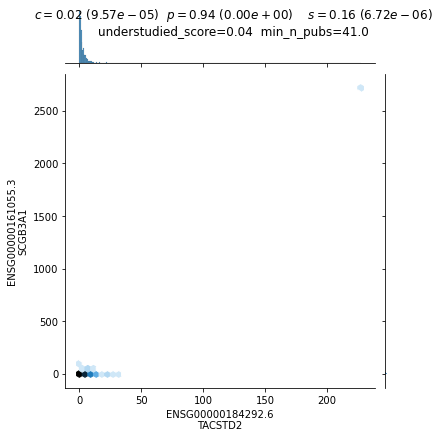

'Index: 7'

('ENSG00000115009.11', 'ENSG00000171345.13')

('CCL20', 'KRT19')

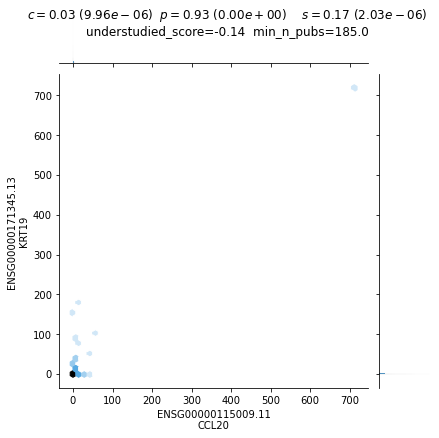

'Index: 8'

('ENSG00000188643.10', 'ENSG00000163739.4')

('S100A16', 'CXCL1')

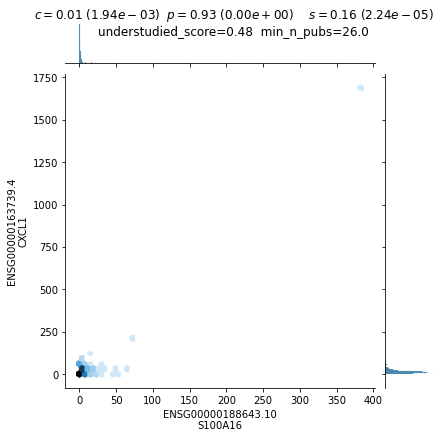

'Index: 9'

('ENSG00000115009.11', 'ENSG00000159713.10')

('CCL20', 'TPPP3')

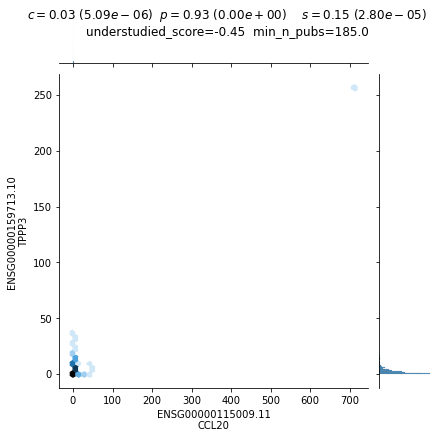

In [118]:
for i in range(min(_tmp_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting by top coefficient value and non-significant other p-value

In [119]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_pval = _tmp_df[
    (_tmp_df[_coef_fdr_col_name] > 0.05) & (_tmp_df["spearman_fdr"] > 0.05)
]  # .sort_values("spearman_fdr", ascending=False)
display(_tmp_df_pval)

ccc   pearson  spearman  \
ENSG00000167644.11 ENSG00000161055.3   0.002391  0.786861  0.001743   
ENSG00000124145.6  ENSG00000161055.3   0.003760  0.766504  0.032290   
ENSG00000167644.11 ENSG00000125968.8   0.006174  0.755109  0.030437   
ENSG00000186081.11 ENSG00000167644.11  0.002807  0.751304  0.044084   
ENSG00000167644.11 ENSG00000184292.6   0.004866  0.742677  0.033257   
...                                         ...       ...       ...   
ENSG00000105519.15 ENSG00000160180.15  0.007242  0.444144  0.054618   
ENSG00000168878.16 ENSG00000182853.11  0.003042  0.444082  0.034941   
ENSG00000172005.10 ENSG00000171611.9   0.007161  0.442409  0.014134   
ENSG00000130005.12 ENSG00000229314.5   0.005341  0.441059  0.026371   
ENSG00000155368.16 ENSG00000130649.9   0.006835  0.435271  0.018676   

                                       clustermatch_rank  pearson_rank  \
ENSG00000167644.11 ENSG00000161055.3             34495.5    12051527.0   
ENSG00000124145.6  ENSG00000161055.3            111394.0    11917143.0   
ENSG00000167644.11 ENSG00000125968.8            352093.5    11835598.0   
ENSG00000186081.11 ENSG00000167644.11            52294.5    11807372.0   
ENSG00000167644.11 ENSG00000184292.6            208381.0    11741732.0   
...                                                  ...           ...   
ENSG00000105519.15 ENSG00000160180.15           481480.0     8846810.0   
ENSG00000168878.16 ENSG00000182853.11            64491.5     8846166.0   
ENSG00000172005.10 ENSG00000171611.9            472225.5     8828788.0   
ENSG00000130005.12 ENSG00000229314.5            257404.5     8814767.0   
ENSG00000155368.16 ENSG00000130649.9            431204.0     8754113.0   

                                       spearman_rank   ccc_fdr    pearson_fdr  \
ENSG00000167644.11 ENSG00000161055.3         35371.0  0.755996  4.046680e-159   
ENSG00000124145.6  ENSG00000161055.3        654786.0  0.447628  4.344739e-146   
ENSG00000167644.11 ENSG00000125968.8        617307.0  0.106127  2.321578e-139   
ENSG00000186081.11 ENSG00000167644.11       891925.0  0.677946  3.394286e-137   
ENSG00000167644.11 ENSG00000184292.6        674587.0  0.249185  1.973771e-132   
...                                              ...       ...            ...   
ENSG00000105519.15 ENSG00000160180.15      1099737.0  0.051282   2.377147e-37   
ENSG00000168878.16 ENSG00000182853.11       708598.0  0.622695   2.438804e-37   
ENSG00000172005.10 ENSG00000171611.9        287494.0  0.053529   4.855192e-37   
ENSG00000130005.12 ENSG00000229314.5        535329.0  0.185499   8.409997e-37   
ENSG00000155368.16 ENSG00000130649.9        379727.0  0.068103   8.601521e-36   

                                       spearman_fdr  understudied_score  \
ENSG00000167644.11 ENSG00000161055.3       0.964032            0.438084   
ENSG00000124145.6  ENSG00000161055.3       0.390476           -0.063064   
ENSG00000167644.11 ENSG00000125968.8       0.418553            0.438084   
ENSG00000186081.11 ENSG00000167644.11      0.238435            0.438084   
ENSG00000167644.11 ENSG00000184292.6       0.376377            0.438084   
...                                             ...                 ...   
ENSG00000105519.15 ENSG00000160180.15      0.142970                -inf   
ENSG00000168878.16 ENSG00000182853.11      0.352379            0.570177   
ENSG00000172005.10 ENSG00000171611.9       0.709247           -0.081655   
ENSG00000130005.12 ENSG00000229314.5       0.483880            0.566790   
ENSG00000155368.16 ENSG00000130649.9       0.621259                -inf   

                                       min_n_pubs  
ENSG00000167644.11 ENSG00000161055.3         15.0  
ENSG00000124145.6  ENSG00000161055.3         41.0  
ENSG00000167644.11 ENSG00000125968.8         15.0  
ENSG00000186081.11 ENSG00000167644.11        15.0  
ENSG00000167644.11 ENSG00000184292.6         15.0  
...                                           ...  
ENSG00000105519.15 ENSG00000160180.15       114.0  
ENSG00000168

'Index: 0'

('ENSG00000167644.11', 'ENSG00000161055.3')

('C19orf33', 'SCGB3A1')

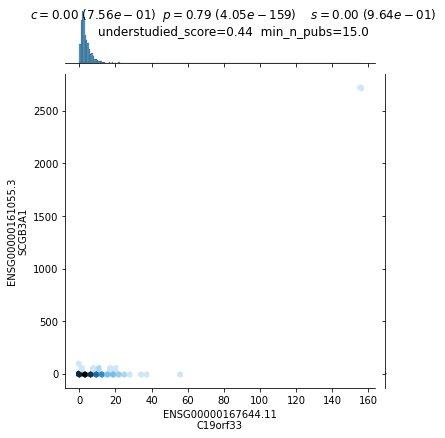

'Index: 1'

('ENSG00000124145.6', 'ENSG00000161055.3')

('SDC4', 'SCGB3A1')

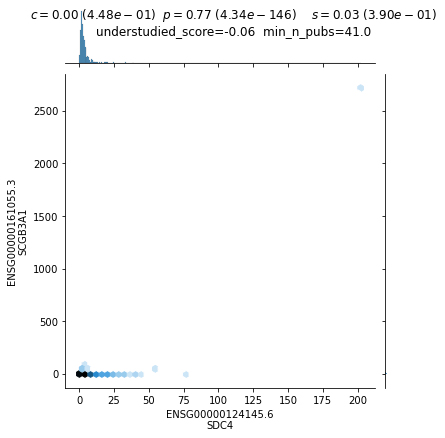

'Index: 2'

('ENSG00000167644.11', 'ENSG00000125968.8')

('C19orf33', 'ID1')

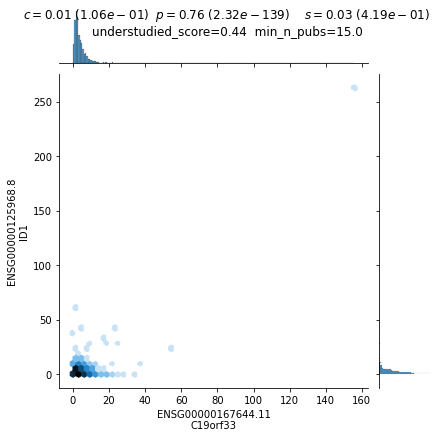

'Index: 3'

('ENSG00000186081.11', 'ENSG00000167644.11')

('KRT5', 'C19orf33')

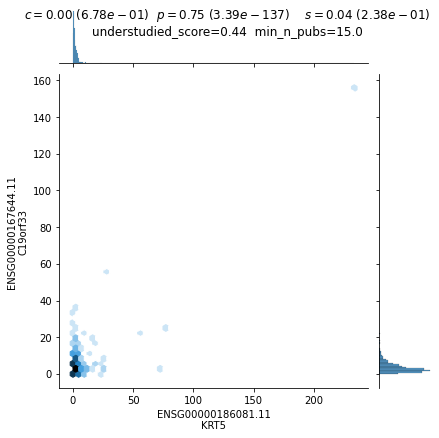

'Index: 4'

('ENSG00000167644.11', 'ENSG00000184292.6')

('C19orf33', 'TACSTD2')

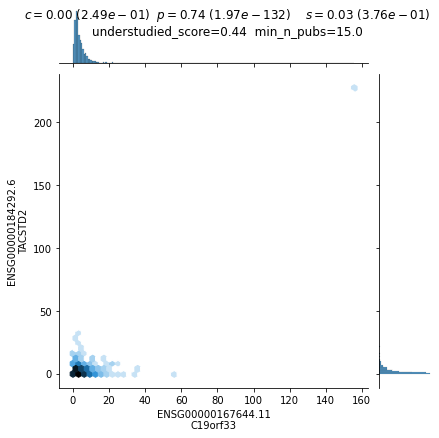

'Index: 5'

('ENSG00000105519.15', 'ENSG00000081041.8')

('CAPS', 'CXCL2')

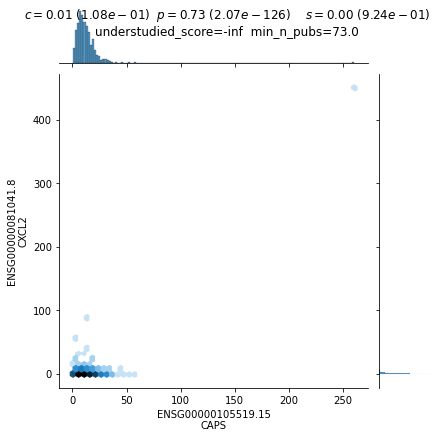

'Index: 6'

('ENSG00000167644.11', 'ENSG00000165272.14')

('C19orf33', 'AQP3')

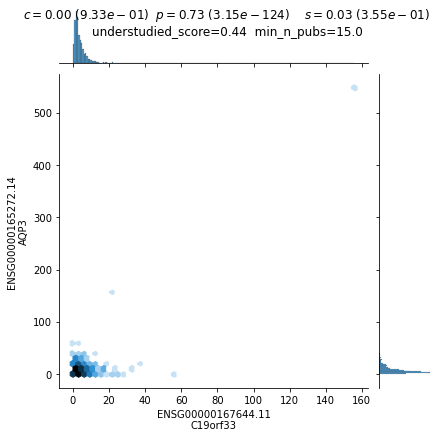

'Index: 7'

('ENSG00000124145.6', 'ENSG00000159713.10')

('SDC4', 'TPPP3')

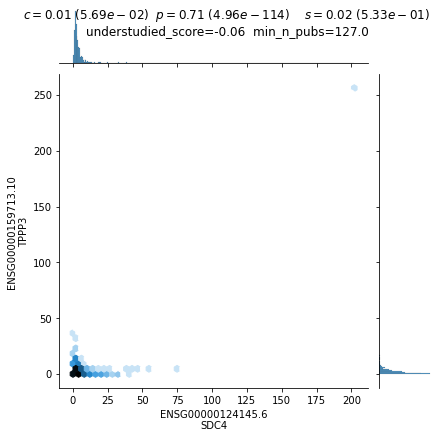

'Index: 8'

('ENSG00000105519.15', 'ENSG00000125968.8')

('CAPS', 'ID1')

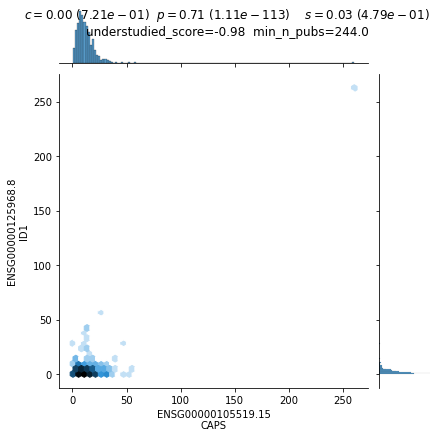

'Index: 9'

('ENSG00000072954.6', 'ENSG00000177791.11')

('TMEM38A', 'MYOZ1')

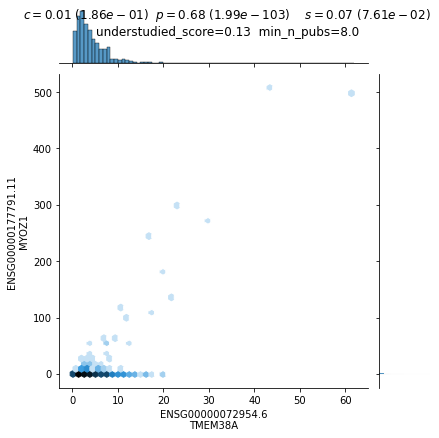

In [120]:
for i in range(min(_tmp_df_pval.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Preview sorting non-significant other p-value

In [121]:
# take a look considering the least significant p-values of the other coefficient
_tmp_df_other_pval = _tmp_df[
    (_tmp_df[_coef_fdr_col_name] > 0.05) & (_tmp_df["spearman_fdr"] > 0.05)
].sort_values(_coef_fdr_col_name, ascending=False)
display(_tmp_df_other_pval)

ccc   pearson  spearman  \
ENSG00000072954.6  ENSG00000125414.18  0.001294  0.659306  0.065326   
ENSG00000168878.16 ENSG00000115009.11  0.001288  0.563814  0.043866   
ENSG00000167644.11 ENSG00000165272.14  0.001355  0.726970  0.034726   
ENSG00000168528.11 ENSG00000186081.11  0.001833  0.540937  0.017645   
ENSG00000167644.11 ENSG00000161055.3   0.002391  0.786861  0.001743   
...                                         ...       ...       ...   
ENSG00000165092.12 ENSG00000125968.8   0.007149  0.523804  0.069486   
ENSG00000172005.10 ENSG00000171611.9   0.007161  0.442409  0.014134   
ENSG00000165092.12 ENSG00000130707.17  0.007234  0.454877  0.047892   
ENSG00000105519.15 ENSG00000160180.15  0.007242  0.444144  0.054618   
ENSG00000134184.12 ENSG00000163631.16  0.007242  0.473504  0.027968   

                                       clustermatch_rank  pearson_rank  \
ENSG00000072954.6  ENSG00000125414.18             7725.0    11012614.0   
ENSG00000168878.16 ENSG00000115009.11             7631.0    10068523.0   
ENSG00000167644.11 ENSG00000165272.14             8636.0    11616259.0   
ENSG00000168528.11 ENSG00000186081.11            17563.5     9836648.0   
ENSG00000167644.11 ENSG00000161055.3             34495.5    12051527.0   
...                                                  ...           ...   
ENSG00000165092.12 ENSG00000125968.8            470828.5     9662667.0   
ENSG00000172005.10 ENSG00000171611.9            472225.5     8828788.0   
ENSG00000165092.12 ENSG00000130707.17           480459.5     8957662.0   
ENSG00000105519.15 ENSG00000160180.15           481480.0     8846810.0   
ENSG00000134184.12 ENSG00000163631.16           481458.0     9149347.0   

                                       spearman_rank   ccc_fdr    pearson_fdr  \
ENSG00000072954.6  ENSG00000125414.18      1310487.0  0.938264   1.382956e-94   
ENSG00000168878.16 ENSG00000115009.11       887447.0  0.934933   6.697732e-64   
ENSG00000167644.11 ENSG00000165272.14       704150.0  0.933386  3.145686e-124   
ENSG00000168528.11 ENSG00000186081.11       358804.0  0.870795   5.875650e-58   
ENSG00000167644.11 ENSG00000161055.3         35371.0  0.755996  4.046680e-159   
...                                              ...       ...            ...   
ENSG00000165092.12 ENSG00000125968.8       1391508.0  0.053762   8.487432e-54   
ENSG00000172005.10 ENSG00000171611.9        287494.0  0.053529   4.855192e-37   
ENSG00000165092.12 ENSG00000130707.17       967485.0  0.051334   2.599960e-39   
ENSG00000105519.15 ENSG00000160180.15      1099737.0  0.051282   2.377147e-37   
ENSG00000134184.12 ENSG00000163631.16       567565.0  0.050409   6.812980e-43   

                                       spearman_fdr  understudied_score  \
ENSG00000072954.6  ENSG00000125414.18      0.079106            0.131763   
ENSG00000168878.16 ENSG00000115009.11      0.240790           -0.453254   
ENSG00000167644.11 ENSG00000165272.14      0.355414            0.438084   
ENSG00000168528.11 ENSG00000186081.11      0.640737            0.542245   
ENSG00000167644.11 ENSG00000161055.3       0.964032            0.438084   
...                                             ...                 ...   
ENSG00000165092.12 ENSG00000125968.8       0.061513           -0.264177   
ENSG00000172005.10 ENSG00000171611.9       0.709247           -0.081655   
ENSG00000165092.12 ENSG00000130707.17      0.199780           -0.264177   
ENSG00000105519.15 ENSG00000160180.15      0.142970                -inf   
ENSG00000134184.12 ENSG00000163631.16      0.457834           -0.426770   

                                       min_n_pubs  
ENSG00000072954.6  ENSG00000125414.18         8.0  
ENSG00000168878.16 ENSG00000115009.11       128.0  
ENSG00000167644.11 ENSG00000165272.14        15.0  
ENSG00000168528.11 ENSG00000186081.11        13.0  
ENSG00000167644.11 ENSG00000161055.3         15.0  
...                                           ...  
ENSG00000165092.12 ENSG00000125968.8        236.0  
ENSG00000172

'Index: 0'

('ENSG00000072954.6', 'ENSG00000125414.18')

('TMEM38A', 'MYH2')

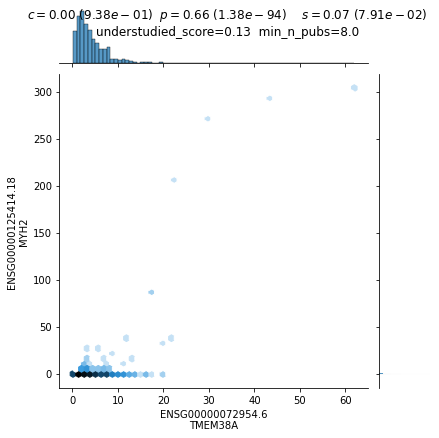

'Index: 1'

('ENSG00000168878.16', 'ENSG00000115009.11')

('SFTPB', 'CCL20')

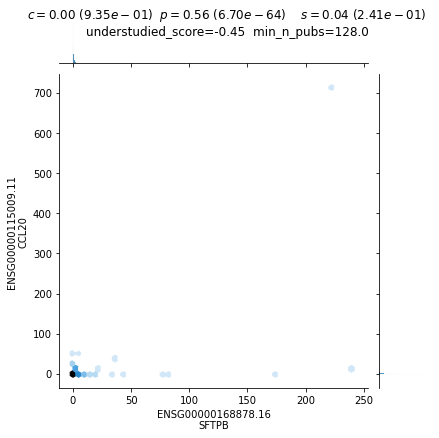

'Index: 2'

('ENSG00000167644.11', 'ENSG00000165272.14')

('C19orf33', 'AQP3')

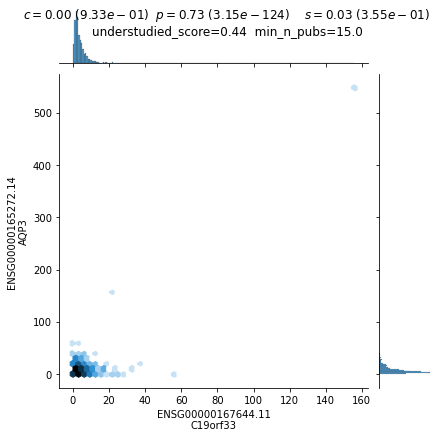

'Index: 3'

('ENSG00000168528.11', 'ENSG00000186081.11')

('SERINC2', 'KRT5')

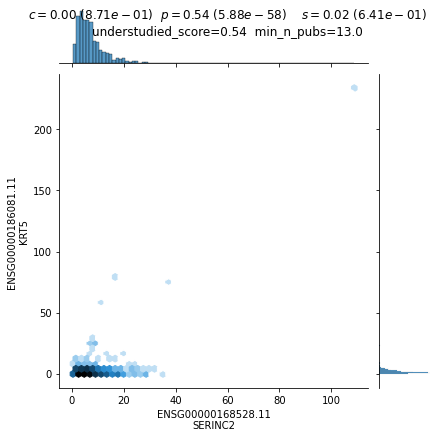

'Index: 4'

('ENSG00000167644.11', 'ENSG00000161055.3')

('C19orf33', 'SCGB3A1')

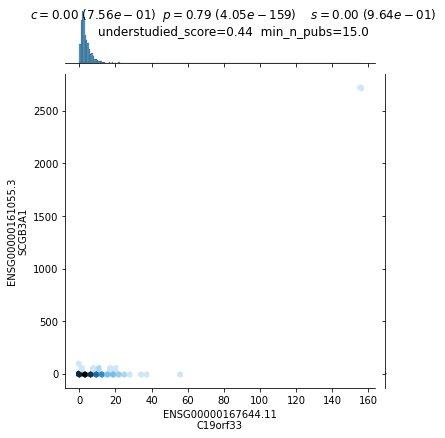

In [122]:
for i in range(min(_tmp_df_other_pval.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df_other_pval, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [123]:
gene_pair_subset = "r_vs_c_rs"

#### Initial selection

Initial (first manuscript submission) gene pair selection considering coefficient values only (but not their p-value):

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-r_vs_c_rs-TPM2_vs_PYGM.svg')

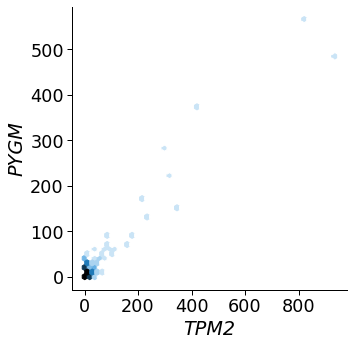

In [124]:
gene0_id = "ENSG00000198467.13"
gene1_id = "ENSG00000068976.13"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [125]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.29999999999999993, 'pearson': 0.9999999999999996, 'spearman': 0.1}

#### Second selection

Second (after first revision) gene pair selection, which considers both coefficient values and p-value.

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/genes-r_vs_c_rs-C19orf33_vs_SCGB3A1.svg')

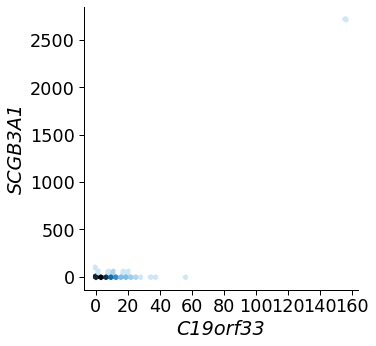

In [126]:
gene0_id = "ENSG00000167644.11"
gene1_id = "ENSG00000161055.3"

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [127]:
# get percentiles
_tmp = df_plot.loc[(gene0_id, gene1_id), ["ccc", "pearson", "spearman"]]
display(get_percentiles(_tmp))

{'ccc': 0.1, 'pearson': 0.9699999999999995, 'spearman': 0.1}

## Spearman vs Pearson

Listing gene pairs, but not interested in this combination.

In [128]:
_tmp_df = get_gene_pairs(
    "spearman",
    {
        "Spearman (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(527, 11)

ccc   pearson  spearman  \
ENSG00000271178.1  ENSG00000211951.2   0.177429  0.102777  0.622770   
ENSG00000116604.17 ENSG00000163739.4   0.179678  0.070643  0.620361   
ENSG00000165272.14 ENSG00000211947.2   0.168576  0.102444  0.617566   
ENSG00000165997.4  ENSG00000163739.4   0.159947  0.091025  0.617083   
ENSG00000117632.22 ENSG00000211673.2   0.172974  0.101755  0.616314   
...                                         ...       ...       ...   
ENSG00000127884.4  ENSG00000211749.1   0.170768  0.116364  0.562867   
ENSG00000133321.10 ENSG00000211976.2   0.164233  0.057779  0.562815   
ENSG00000145428.14 ENSG00000133800.8   0.153623  0.049136  0.562814   
ENSG00000115866.10 ENSG00000139194.7   0.172974  0.079631  0.562781   
ENSG00000104915.14 ENSG00000130598.15  0.164233  0.033293  0.562756   

                                       clustermatch_rank  pearson_rank  \
ENSG00000271178.1  ENSG00000211951.2           8687458.5     3354069.0   
ENSG00000116604.17 ENSG00000163739.4           8729510.0     2429323.0   
ENSG00000165272.14 ENSG00000211947.2           8516910.5     3344965.0   
ENSG00000165997.4  ENSG00000163739.4           8343391.5     3029426.0   
ENSG00000117632.22 ENSG00000211673.2           8602668.0     3326113.0   
...                                                  ...           ...   
ENSG00000127884.4  ENSG00000211749.1           8559745.0     3711660.0   
ENSG00000133321.10 ENSG00000211976.2           8430572.5     2026490.0   
ENSG00000145428.14 ENSG00000133800.8           8211015.0     1746623.0   
ENSG00000115866.10 ENSG00000139194.7           8602668.0     2699737.0   
ENSG00000104915.14 ENSG00000130598.15          8430572.5     1209961.0   

                                       spearman_rank  ccc_fdr  pearson_fdr  \
ENSG00000271178.1  ENSG00000211951.2       9466282.0      NaN          NaN   
ENSG00000116604.17 ENSG00000163739.4       9437692.0      NaN          NaN   
ENSG00000165272.14 ENSG00000211947.2       9404603.0      NaN          NaN   
ENSG00000165997.4  ENSG00000163739.4       9398943.0      NaN          NaN   
ENSG00000117632.22 ENSG00000211673.2       9389809.0      NaN          NaN   
...                                              ...      ...          ...   
ENSG00000127884.4  ENSG00000211749.1       8749764.0      NaN          NaN   
ENSG00000133321.10 ENSG00000211976.2       8749167.0      NaN          NaN   
ENSG00000145428.14 ENSG00000133800.8       8749159.0      NaN          NaN   
ENSG00000115866.10 ENSG00000139194.7       8748721.0      NaN          NaN   
ENSG00000104915.14 ENSG00000130598.15      8748430.0      NaN          NaN   

                                       spearman_fdr  understudied_score  \
ENSG00000271178.1  ENSG00000211951.2            NaN                -inf   
ENSG00000116604.17 ENSG00000163739.4            NaN           -0.257122   
ENSG00000165272.14 ENSG00000211947.2            NaN           -0.469232   
ENSG00000165997.4  ENSG00000163739.4            NaN            0.121186   
ENSG00000117632.22 ENSG00000211673.2            NaN                -inf   
...                                             ...                 ...   
ENSG00000127884.4  ENSG00000211749.1            NaN            0.226101   
ENSG00000133321.10 ENSG00000211976.2            NaN           -0.264695   
ENSG00000145428.14 ENSG00000133800.8            NaN            0.040776   
ENSG00000115866.10 ENSG00000139194.7            NaN            0.002274   
ENSG00000104915.14 ENSG00000130598.15           NaN            0.276144   

                                       min_n_pubs  
ENSG00000271178.1  ENSG00000211951.2          inf  
ENSG00000116604.17 ENSG00000163739.4         78.0  
ENSG00000165272.14 ENSG00000211947.2        139.0  
ENSG00000165997.4  ENSG00000163739.4         13.0  
ENSG00000117632.22 ENSG00000211673.2          inf  
...                                           ...  
ENSG00000127884.4  ENSG00000211749.1         45.0  
ENSG00000133321.10 ENSG00000211976.2         50.

### Preview

'Index: 0'

('ENSG00000271178.1', 'ENSG00000211951.2')

('IGHV3OR16-13', 'IGHV2-26')

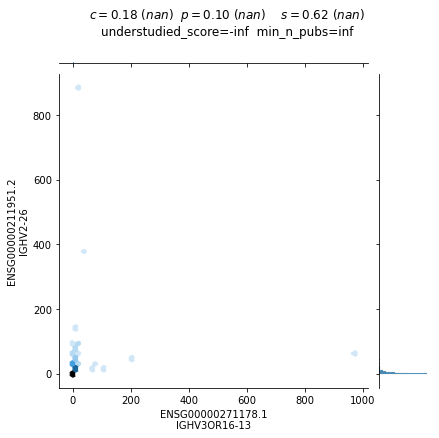

'Index: 1'

('ENSG00000116604.17', 'ENSG00000163739.4')

('MEF2D', 'CXCL1')

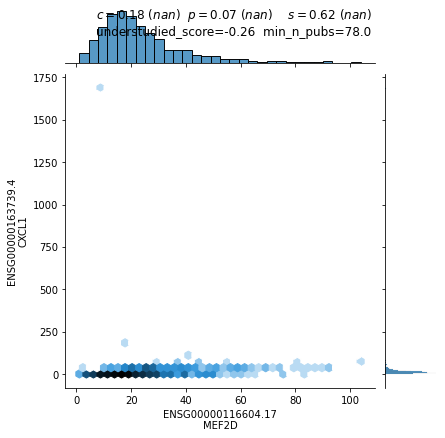

'Index: 2'

('ENSG00000165272.14', 'ENSG00000211947.2')

('AQP3', 'IGHV3-21')

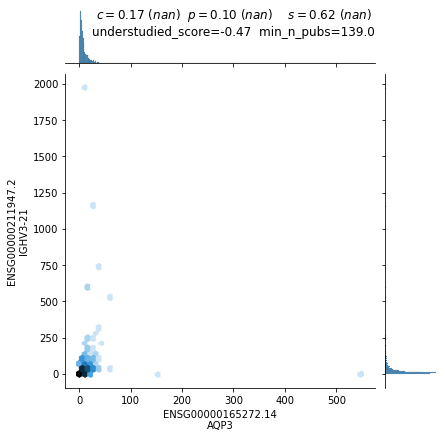

'Index: 3'

('ENSG00000165997.4', 'ENSG00000163739.4')

('ARL5B', 'CXCL1')

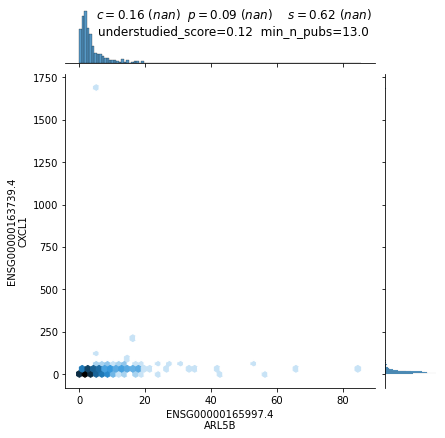

'Index: 4'

('ENSG00000117632.22', 'ENSG00000211673.2')

('STMN1', 'IGLV3-1')

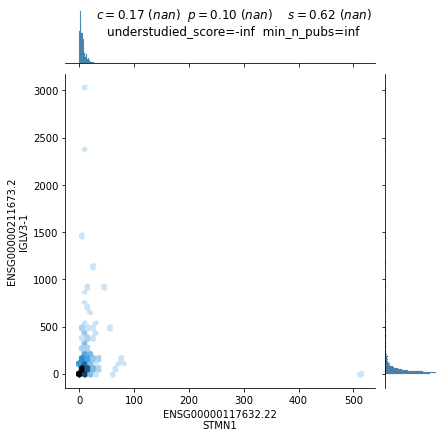

In [129]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection